# **Phase 1: Preparation & Setup**

# **Lets Start**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
retail=pd.read_csv("retail_data.csv")

In [ ]:
retail

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15841,4661951.0,25718.0,Cameron Davis,James9@gmail.com,6.487108e+09,3324 Harris Shoal,Portsmouth,England,56986.0,UK,...,1119.259746,Clothing,Nike,Shoes,Average,Same-Day,PayPal,Delivered,2.0,Sneakers
15842,5086250.0,14968.0,Sean Ward,Jerry15@gmail.com,7.360560e+09,25558 Rebecca Cove,Portsmouth,England,16912.0,UK,...,370.805820,Clothing,Zara,Dress,Bad,Express,PayPal,Delivered,1.0,Fit and flare dress
15843,3826300.0,10245.0,Destiny Rodriguez MD,Malik18@gmail.com,5.118152e+09,129 Michael Crossing Apt. 552,Portsmouth,England,86182.0,UK,...,2142.868458,Books,Penguin Books,Children's,Bad,Standard,Credit Card,Delivered,1.0,Building blocks
15844,3862318.0,81610.0,Debra Shaw,Danielle76@gmail.com,6.284035e+09,430 Johnston Unions Apt. 000,Portsmouth,England,63004.0,UK,...,2151.568277,Home Decor,Home Depot,Decorations,Excellent,Express,PayPal,Delivered,5.0,Picture frames


In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15846 entries, 0 to 15845
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    15829 non-null  float64
 1   Customer_ID       15821 non-null  float64
 2   Name              15834 non-null  object 
 3   Email             15832 non-null  object 
 4   Phone             15824 non-null  float64
 5   Address           15836 non-null  object 
 6   City              15846 non-null  object 
 7   State             15846 non-null  object 
 8   Zipcode           15832 non-null  float64
 9   Country           15846 non-null  object 
 10  Age               15844 non-null  float64
 11  Gender            15827 non-null  object 
 12  Income            15846 non-null  object 
 13  Customer_Segment  15846 non-null  object 
 14  Date              15828 non-null  object 
 15  Year              15828 non-null  float64
 16  Month             15820 non-null  object

# **Create **two** different .csv files named retail_cleaned_dropna.csv (all rows with any missing value removed) and retail_cleaned_threshold.csv (drop columns with >40% missing values, then drop remaining missing rows)**

In [ ]:
# Simple Phase 1 cleaning (copy-paste into Colab)
import pandas as pd

# 1) load (if you've already loaded 'retail' you can skip this line)
retail = pd.read_csv("retail_data.csv", parse_dates=['Date'], low_memory=False)

# 2) report columns with missing values (count + percent)
miss_cnt = retail.isnull().sum()
miss_cnt = miss_cnt[miss_cnt > 0].sort_values(ascending=False)
miss_pct = (miss_cnt / len(retail) * 100).round(2)
missing_report = pd.concat([miss_cnt, miss_pct], axis=1)
missing_report.columns = ['missing_count', 'missing_percent']
print("Columns with missing values:\n")
print(missing_report)

# 3A) Option 1 — aggressive: drop any row that has at least one missing value
cleaned_aggressive = retail.dropna().reset_index(drop=True)
print("\nAggressive cleaned shape (drop rows with ANY missing):", cleaned_aggressive.shape)
cleaned_aggressive.to_csv("retail_cleaned_dropna.csv", index=False)
print("Saved -> retail_cleaned_dropna.csv")

# 3B) Option 2 — safer: drop columns with > THRESHOLD% missing, then drop remaining rows with missing
THRESHOLD = 40.0   # percent; change if you want (e.g., 30 or 50)
cols_to_keep = (retail.isnull().mean() * 100) <= THRESHOLD
cols_kept = retail.columns[cols_to_keep]
cleaned_threshold = retail[cols_kept].dropna().reset_index(drop=True)
print(f"\nSafer cleaned shape (drop cols >{THRESHOLD}% missing, then drop rows): {cleaned_threshold.shape}")
print("Columns kept:", len(cols_kept))
cleaned_threshold.to_csv("retail_cleaned_threshold.csv", index=False)
print("Saved -> retail_cleaned_threshold.csv")

# Done. Pick the file you want to use next.


Columns with missing values:

                  missing_count  missing_percent
Month                        26             0.16
Customer_ID                  25             0.16
Total_Purchases              24             0.15
Total_Amount                 23             0.15
Phone                        22             0.14
Order_Status                 22             0.14
Gender                       19             0.12
Payment_Method               19             0.12
Ratings                      19             0.12
Feedback                     19             0.12
Product_Category             18             0.11
Year                         18             0.11
Date                         18             0.11
Shipping_Method              17             0.11
Transaction_ID               17             0.11
Product_Brand                16             0.10
Time                         15             0.09
Email                        14             0.09
Zipcode                      14        

In [ ]:
retail1 = pd.read_csv("retail_cleaned_dropna.csv", low_memory=False, parse_dates=['Date'], infer_datetime_format=True)
retail2 = pd.read_csv("retail_cleaned_threshold.csv", low_memory=False, parse_dates=['Date'], infer_datetime_format=True)


In [ ]:
retail1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15478 entries, 0 to 15477
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    15478 non-null  float64
 1   Customer_ID       15478 non-null  float64
 2   Name              15478 non-null  object 
 3   Email             15478 non-null  object 
 4   Phone             15478 non-null  float64
 5   Address           15478 non-null  object 
 6   City              15478 non-null  object 
 7   State             15478 non-null  object 
 8   Zipcode           15478 non-null  float64
 9   Country           15478 non-null  object 
 10  Age               15478 non-null  float64
 11  Gender            15478 non-null  object 
 12  Income            15478 non-null  object 
 13  Customer_Segment  15478 non-null  object 
 14  Date              15478 non-null  object 
 15  Year              15478 non-null  float64
 16  Month             15478 non-null  object

In [ ]:
retail2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15478 entries, 0 to 15477
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    15478 non-null  float64
 1   Customer_ID       15478 non-null  float64
 2   Name              15478 non-null  object 
 3   Email             15478 non-null  object 
 4   Phone             15478 non-null  float64
 5   Address           15478 non-null  object 
 6   City              15478 non-null  object 
 7   State             15478 non-null  object 
 8   Zipcode           15478 non-null  float64
 9   Country           15478 non-null  object 
 10  Age               15478 non-null  float64
 11  Gender            15478 non-null  object 
 12  Income            15478 non-null  object 
 13  Customer_Segment  15478 non-null  object 
 14  Date              15478 non-null  object 
 15  Year              15478 non-null  float64
 16  Month             15478 non-null  object

# **In this dataset, retail1 and retail2 are effectively the same because all columns had less than 40% missing. So it doesn’t matter which one you use — you can just pick one (say retail1) and continue.**

In [ ]:
df=retail1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15478 entries, 0 to 15477
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    15478 non-null  float64
 1   Customer_ID       15478 non-null  float64
 2   Name              15478 non-null  object 
 3   Email             15478 non-null  object 
 4   Phone             15478 non-null  float64
 5   Address           15478 non-null  object 
 6   City              15478 non-null  object 
 7   State             15478 non-null  object 
 8   Zipcode           15478 non-null  float64
 9   Country           15478 non-null  object 
 10  Age               15478 non-null  float64
 11  Gender            15478 non-null  object 
 12  Income            15478 non-null  object 
 13  Customer_Segment  15478 non-null  object 
 14  Date              15478 non-null  object 
 15  Year              15478 non-null  float64
 16  Month             15478 non-null  object

# Phase 2: Initial Reconnaissance :

In [ ]:
df.describe()

,Transaction_ID,Customer_ID,Phone,Zipcode,Age,Year,Total_Purchases,Amount,Total_Amount,Ratings
count,1.547800e+04,15478.000000,1.547800e+04,15478.000000,15478.000000,15478.000000,15478.000000,15478.000000,15478.000000,15478.000000
mean,5.515955e+06,55347.380799,5.459888e+09,49984.830404,22.046324,2023.170629,5.377245,254.628212,1377.689674,2.737886
std,2.590288e+06,26091.354916,2.602562e+09,28970.250798,6.882325,0.376197,2.876047,141.184880,1141.920851,1.390290
min,1.000307e+06,10001.000000,1.000146e+09,510.000000,18.000000,2023.000000,1.000000,10.020514,10.982715,1.000000
25%,3.252376e+06,32820.750000,3.201249e+09,25048.750000,19.000000,2023.000000,3.000000,132.494328,436.063176,1.000000
50%,5.500531e+06,55402.000000,5.410023e+09,50007.000000,21.000000,2023.000000,5.000000,254.866264,1041.792987,2.000000
75%,7.775884e+06,78172.500000,7.751368e+09,74691.500000,24.000000,2023.000000,8.000000,376.935508,2046.615171,4.000000
max,9.999228e+06,99989.000000,9.999896e+09,99941.000000,70.000000,2024.000000,10.000000,499.962580,4999.625796,5.000000


In [ ]:
df.shape

(15478, 30)

In [ ]:
df.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [ ]:
df.tail()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
15473,9889882.0,76289.0,Michael Caldwell,Cassandra56@gmail.com,5.514412e+09,882 Stacy Meadow Apt. 116,Portsmouth,England,14989.0,UK,...,412.974161,Electronics,Sony,Television,Excellent,Same-Day,Credit Card,Delivered,5.0,OLED TV
15474,4661951.0,25718.0,Cameron Davis,James9@gmail.com,6.487108e+09,3324 Harris Shoal,Portsmouth,England,56986.0,UK,...,1119.259746,Clothing,Nike,Shoes,Average,Same-Day,PayPal,Delivered,2.0,Sneakers
15475,5086250.0,14968.0,Sean Ward,Jerry15@gmail.com,7.360560e+09,25558 Rebecca Cove,Portsmouth,England,16912.0,UK,...,370.805820,Clothing,Zara,Dress,Bad,Express,PayPal,Delivered,1.0,Fit and flare dress
15476,3826300.0,10245.0,Destiny Rodriguez MD,Malik18@gmail.com,5.118152e+09,129 Michael Crossing Apt. 552,Portsmouth,England,86182.0,UK,...,2142.868458,Books,Penguin Books,Children's,Bad,Standard,Credit Card,Delivered,1.0,Building blocks
15477,3862318.0,81610.0,Debra Shaw,Danielle76@gmail.com,6.284035e+09,430 Johnston Unions Apt. 000,Portsmouth,England,63004.0,UK,...,2151.568277,Home Decor,Home Depot,Decorations,Excellent,Express,PayPal,Delivered,5.0,Picture frames


In [ ]:
numerical_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
temporal_cols   = [c for c in df.columns if 'date' in c.lower() or c in ['Year','Month','Time']]

print("\n=== DATA CLASSIFICATION ===")
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)
print("Temporal columns:", temporal_cols)


=== DATA CLASSIFICATION ===
Numerical columns: ['Transaction_ID', 'Customer_ID', 'Phone', 'Zipcode', 'Age', 'Year', 'Total_Purchases', 'Amount', 'Total_Amount', 'Ratings']
Categorical columns: ['Name', 'Email', 'Address', 'City', 'State', 'Country', 'Gender', 'Income', 'Customer_Segment', 'Date', 'Month', 'Time', 'Product_Category', 'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method', 'Order_Status', 'products']
Temporal columns: ['Date', 'Year', 'Month', 'Time']


# **Phase 3: Uncovering Insights (The Core Mission)**

Univariate Analysis:

In [ ]:
import pandas as pd
import numpy as np

# (assuming df = retail1 is already loaded and cleaned)
num_cols = ['Age', 'Year', 'Amount', 'Ratings']

# 1. Central Tendency: Mean, Median, Mode
print("\n1. Measure of Central Tendency:")
for col in num_cols:
    if col in df.columns:
        print(f"\n-> {col}:")
        print(f"   Mean   : {df[col].mean():.2f}")
        print(f"   Median : {df[col].median():.2f}")
        print(f"   Mode   : {df[col].mode().tolist()[:3]}")  # show top 3 modes
print('='*100)

# 2. Measure of Dispersion
print("\n2. Measure of Dispersion:")
for col in num_cols:
    if col in df.columns:
        print(f"\n-> {col}:")
        print(f"   Range (Min - Max)          : {df[col].min():.2f} to {df[col].max():.2f}")
        print(f"   Variance                   : {df[col].var():.2f}")
        print(f"   Std Deviation              : {df[col].std():.2f}")
        print(f"   IQR (Q3 - Q1)              : {df[col].quantile(0.75) - df[col].quantile(0.25):.2f}")
        print(f"   25th Percentile (Q1)       : {df[col].quantile(0.25):.2f}")
        print(f"   50th Percentile (Median)   : {df[col].quantile(0.50):.2f}")
        print(f"   75th Percentile (Q3)       : {df[col].quantile(0.75):.2f}")
print('='*100)

# 3. Distribution Analysis (Skewness & Kurtosis)
print("\n3. Distribution Analysis:")
for col in num_cols:
    if col in df.columns:
        skew = df[col].skew()
        kurt = df[col].kurtosis()

        # Skewness interpretation
        if skew > 0:
            skew_type = "Positive Skew (Right Skew)"
        elif skew < 0:
            skew_type = "Negative Skew (Left Skew)"
        else:
            skew_type = "Zero Skew"

        # Kurtosis interpretation
        if kurt == 0:
            kurt_type = "Mesokurtic (Normal)"
        elif kurt > 0:
            kurt_type = "Leptokurtic (Peaked)"
        else:
            kurt_type = "Platykurtic (Flat)"

        print(f"\n-> {col}:")
        print(f"   Skewness : {skew:.4f} -> {skew_type}")
        print(f"   Kurtosis : {kurt:.4f} -> {kurt_type}")



1. Measure of Central Tendency:

-> Age:
   Mean   : 22.05
   Median : 21.00
   Mode   : [19.0]

-> Year:
   Mean   : 2023.17
   Median : 2023.00
   Mode   : [2023.0]

-> Amount:
   Mean   : 254.63
   Median : 254.87
   Mode   : [10.02051429, 10.0364424, 10.04008959]

-> Ratings:
   Mean   : 2.74
   Median : 2.00
   Mode   : [1.0]

2. Measure of Dispersion:

-> Age:
   Range (Min - Max)          : 18.00 to 70.00
   Variance                   : 47.37
   Std Deviation              : 6.88
   IQR (Q3 - Q1)              : 5.00
   25th Percentile (Q1)       : 19.00
   50th Percentile (Median)   : 21.00
   75th Percentile (Q3)       : 24.00

-> Year:
   Range (Min - Max)          : 2023.00 to 2024.00
   Variance                   : 0.14
   Std Deviation              : 0.38
   IQR (Q3 - Q1)              : 0.00
   25th Percentile (Q1)       : 2023.00
   50th Percentile (Median)   : 2023.00
   75th Percentile (Q3)       : 2023.00

-> Amount:
   Range (Min - Max)          : 10.02 to 499.96
   Va

Visualization of data distribution :

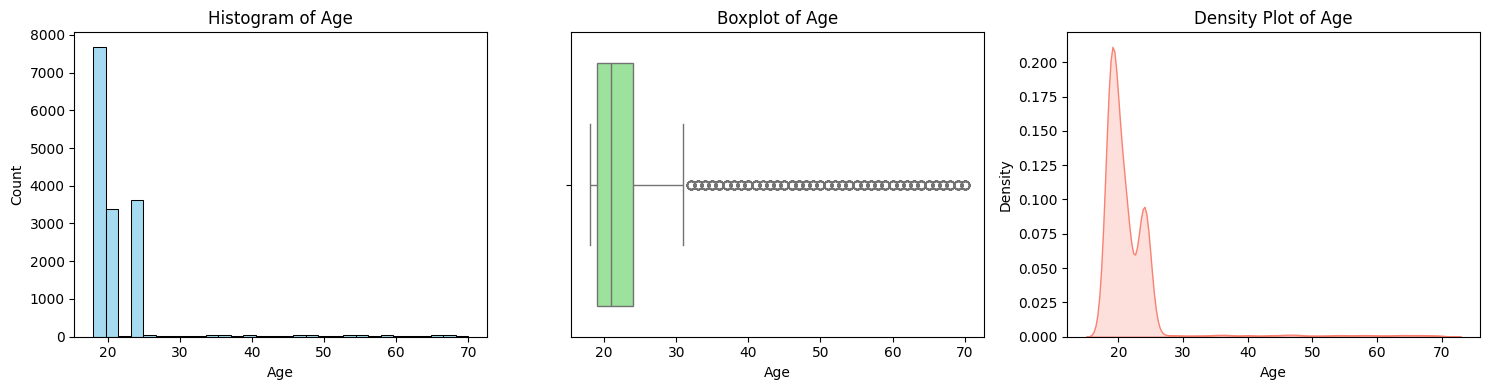

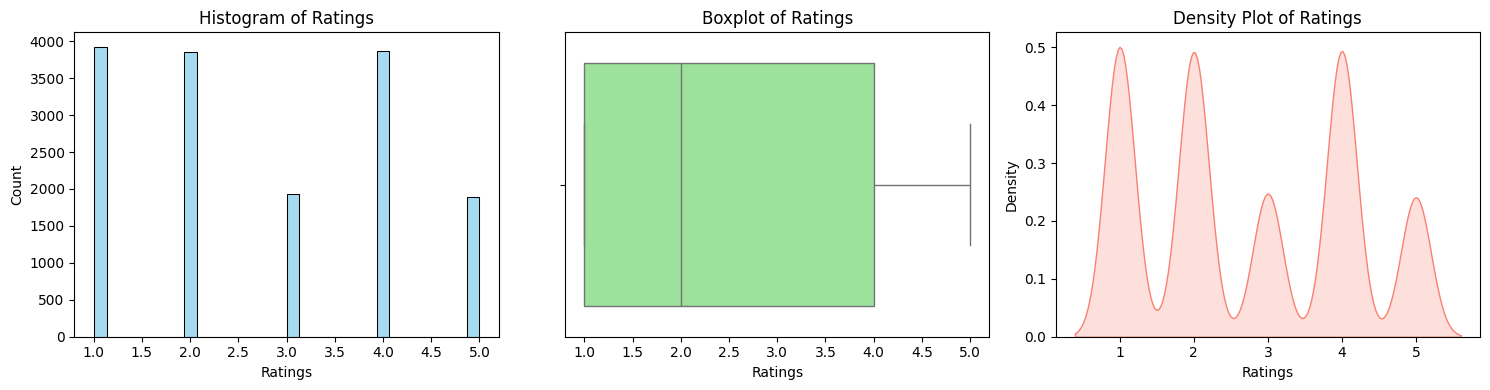

=== Age Summary ===
Mean   : 22.05
Median : 21.00
Min    : 18.00
Max    : 70.00


=== Ratings Summary ===
Mean   : 2.74
Median : 2.00
Min    : 1.00
Max    : 5.00


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols_to_analyze = ['Age', 'Ratings']

for col in cols_to_analyze:
    if col in df.columns:
        plt.figure(figsize=(15,4))

        # Histogram
        plt.subplot(1,3,1)
        sns.histplot(df[col], kde=False, bins=30, color='skyblue')
        plt.title(f'Histogram of {col}')

        # Boxplot
        plt.subplot(1,3,2)
        sns.boxplot(x=df[col], color='lightgreen')
        plt.title(f'Boxplot of {col}')

        # Density plot
        plt.subplot(1,3,3)
        sns.kdeplot(df[col], shade=True, color='salmon')
        plt.title(f'Density Plot of {col}')

        plt.tight_layout()
        plt.show()
    else:
        print(f"Column '{col}' not found in df")
  # Summary statistics for Age
print("=== Age Summary ===")
print(f"Mean   : {df['Age'].mean():.2f}")
print(f"Median : {df['Age'].median():.2f}")
print(f"Min    : {df['Age'].min():.2f}")
print(f"Max    : {df['Age'].max():.2f}")

print("\n")

# Summary statistics for Ratings
print("=== Ratings Summary ===")
print(f"Mean   : {df['Ratings'].mean():.2f}")
print(f"Median : {df['Ratings'].median():.2f}")
print(f"Min    : {df['Ratings'].min():.2f}")
print(f"Max    : {df['Ratings'].max():.2f}")



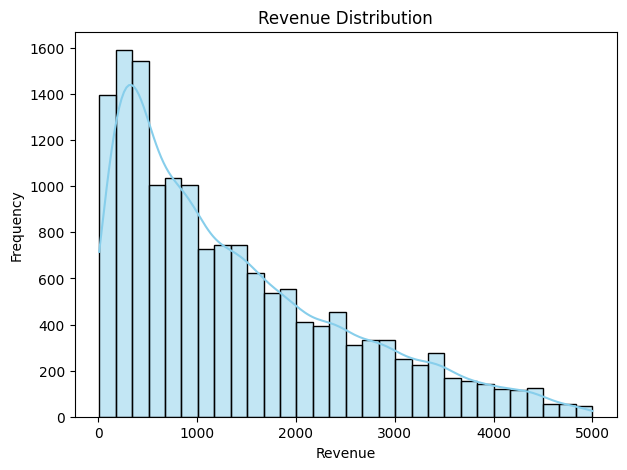

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create Revenue column (if not already created)
df['Revenue'] = df['Total_Purchases'] * df['Amount']

# Histogram + Density
plt.figure(figsize=(7,5))
sns.histplot(df['Revenue'], bins=30, kde=True, color='skyblue')
plt.title("Revenue Distribution")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()


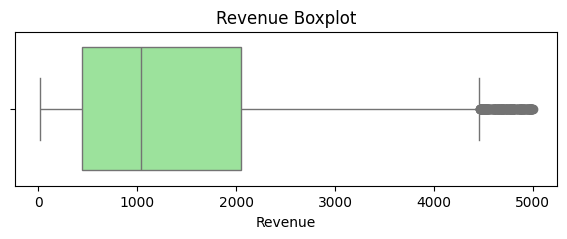

=== Revenue Summary ===
Mean   : 1377.69
Median : 1041.79
Min    : 10.98
Max    : 4999.63


In [ ]:
# Boxplot
plt.figure(figsize=(7,2))
sns.boxplot(x=df['Revenue'], color='lightgreen')
plt.title("Revenue Boxplot")
plt.xlabel("Revenue")
plt.show()
# Summary statistics
print("=== Revenue Summary ===")
print(f"Mean   : {df['Revenue'].mean():.2f}")
print(f"Median : {df['Revenue'].median():.2f}")
print(f"Min    : {df['Revenue'].min():.2f}")
print(f"Max    : {df['Revenue'].max():.2f}")

Univariate analysis for categorical variable

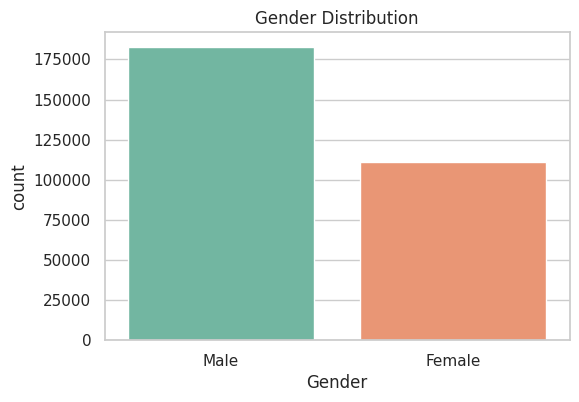

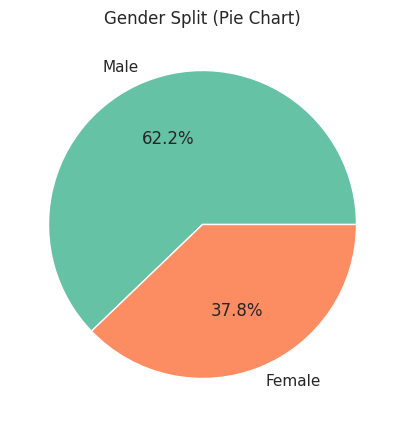

=== Gender Counts (top 10 shown) ===
Gender
Male      182764
Female    111147
Name: count, dtype: int64
Max: 182764
Min: 111147


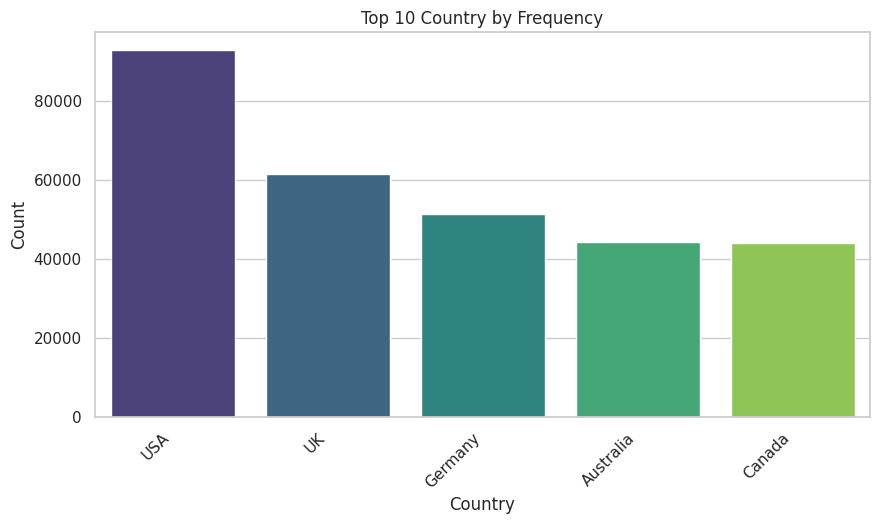

=== Country Counts (top 10 shown) ===
Country
USA          92800
UK           61398
Germany      51433
Australia    44170
Canada       44110
Name: count, dtype: int64
Max: 92800
Min: 44110


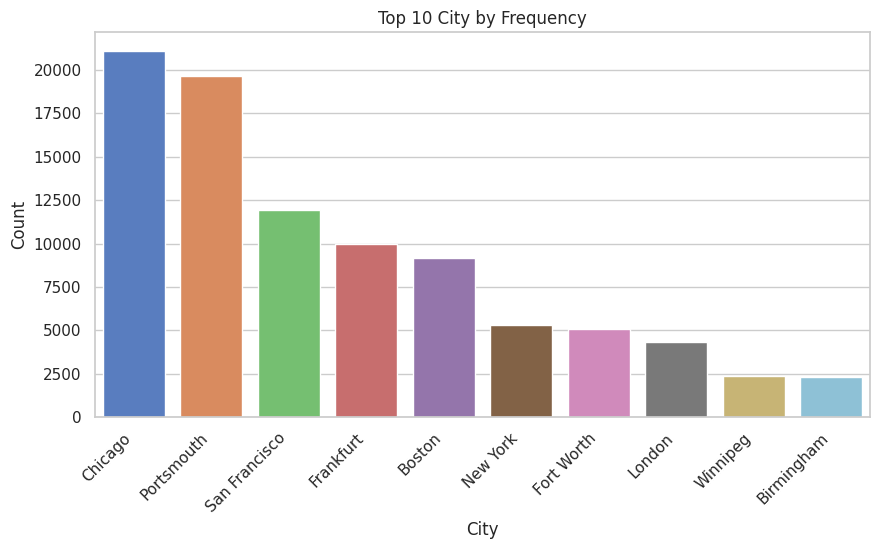

=== City Counts (top 10 shown) ===
City
Chicago          21109
Portsmouth       19648
San Francisco    11938
Frankfurt         9947
Boston            9187
New York          5321
Fort Worth        5090
London            4345
Winnipeg          2355
Birmingham        2313
Name: count, dtype: int64
Max: 21109
Min: 815


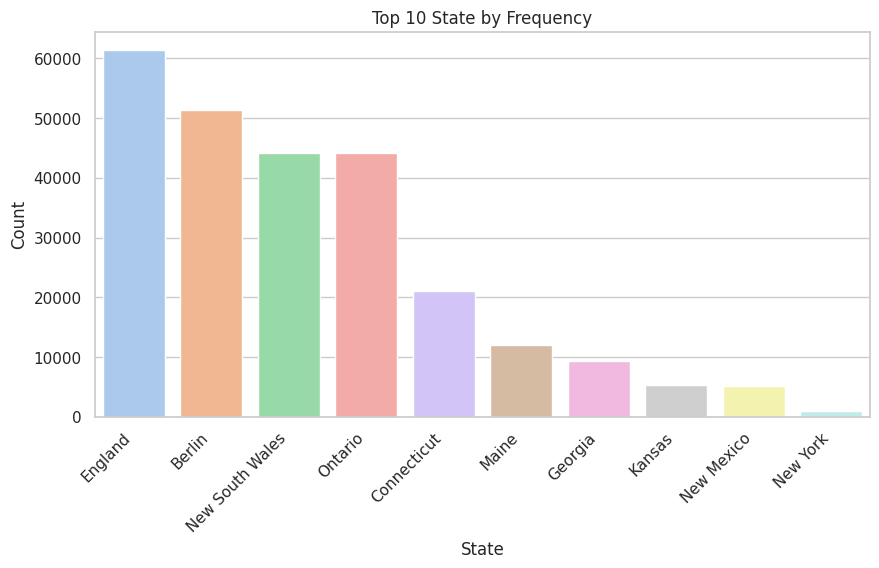

=== State Counts (top 10 shown) ===
State
England            61398
Berlin             51433
New South Wales    44170
Ontario            44110
Connecticut        21120
Maine              11953
Georgia             9278
Kansas              5375
New Mexico          5077
New York             970
Name: count, dtype: int64
Max: 61398
Min: 828


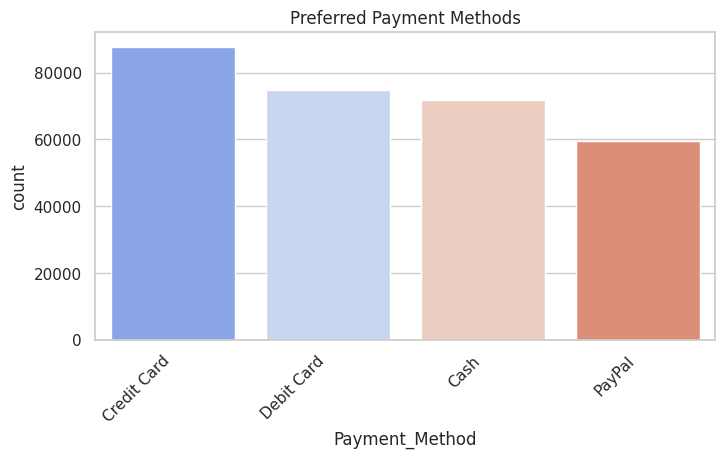

=== Payment_Method Counts (top 10 shown) ===
Payment_Method
Credit Card    87781
Debit Card     74744
Cash           71927
PayPal         59459
Name: count, dtype: int64
Max: 87781
Min: 59459


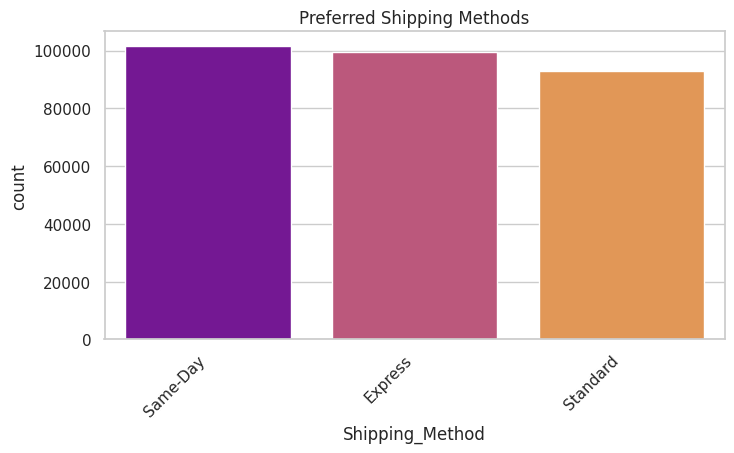

=== Shipping_Method Counts (top 10 shown) ===
Shipping_Method
Same-Day    101541
Express      99600
Standard     92770
Name: count, dtype: int64
Max: 101541
Min: 92770


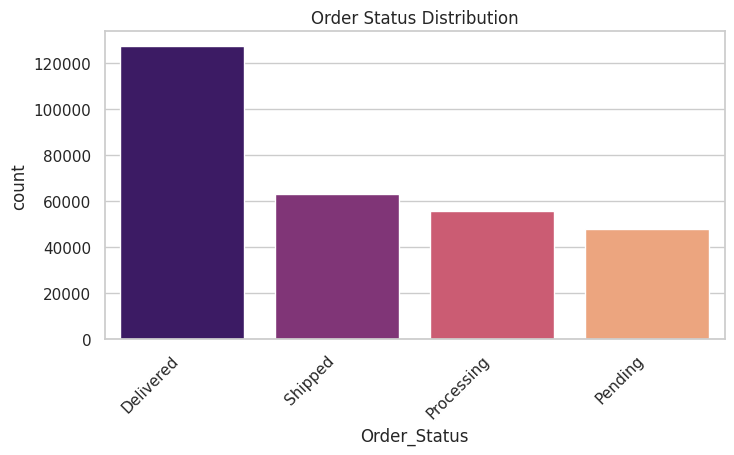

=== Order_Status Counts (top 10 shown) ===
Order_Status
Delivered     127238
Shipped        63275
Processing     55655
Pending        47743
Name: count, dtype: int64
Max: 127238
Min: 47743


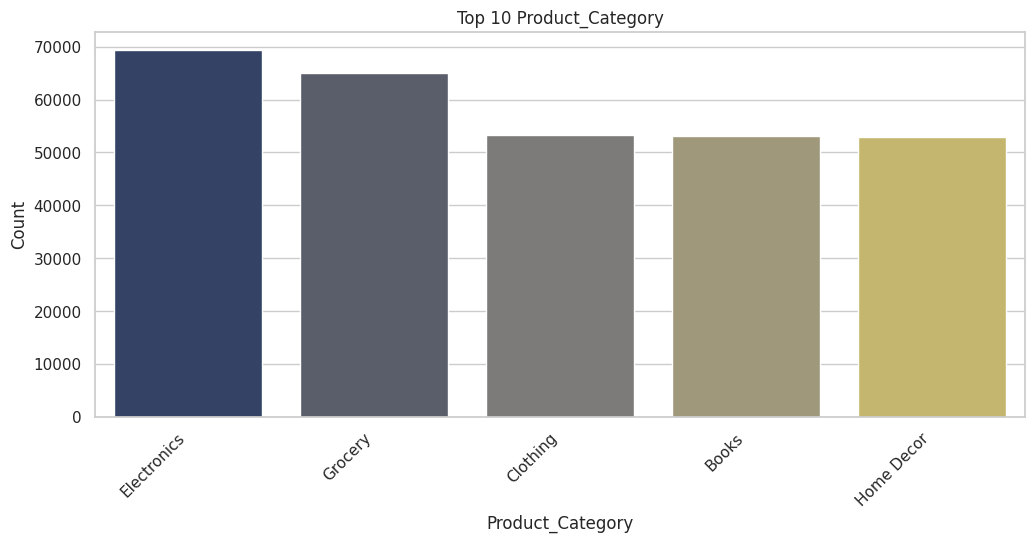

=== Product_Category Counts (top 10 shown) ===
Product_Category
Electronics    69365
Grocery        65126
Clothing       53282
Books          53199
Home Decor     52939
Name: count, dtype: int64
Max: 69365
Min: 52939


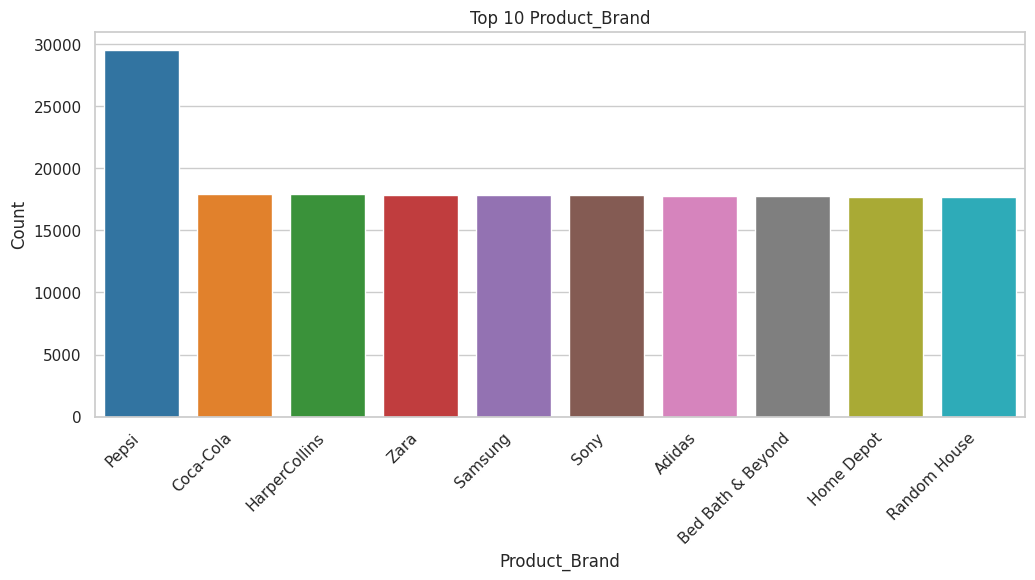

=== Product_Brand Counts (top 10 shown) ===
Product_Brand
Pepsi                29538
Coca-Cola            17951
HarperCollins        17901
Zara                 17876
Samsung              17866
Sony                 17848
Adidas               17760
Bed Bath & Beyond    17746
Home Depot           17673
Random House         17671
Name: count, dtype: int64
Max: 29538
Min: 2208


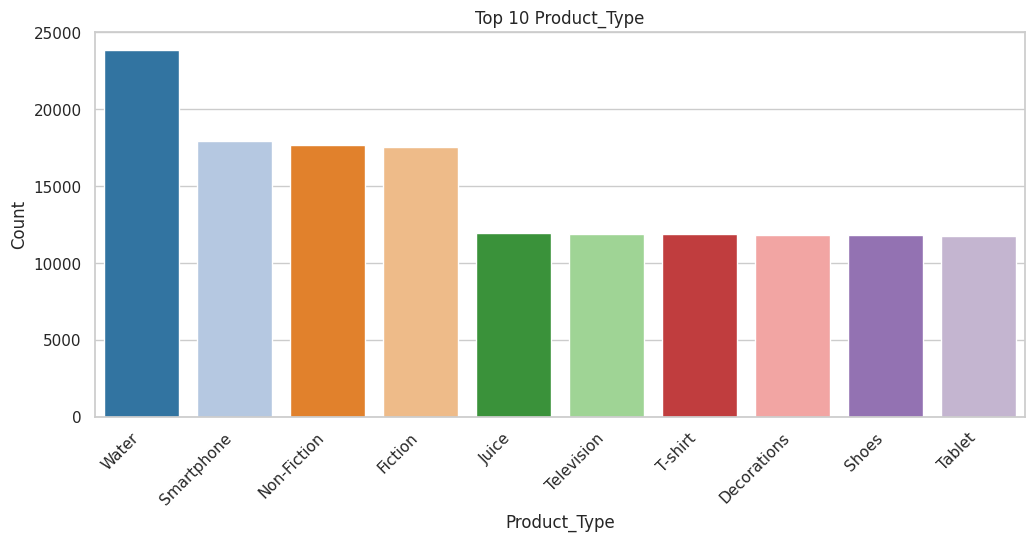

=== Product_Type Counts (top 10 shown) ===
Product_Type
Water          23838
Smartphone     17929
Non-Fiction    17672
Fiction        17544
Juice          11919
Television     11874
T-shirt        11871
Decorations    11835
Shoes          11808
Tablet         11754
Name: count, dtype: int64
Max: 23838
Min: 2208


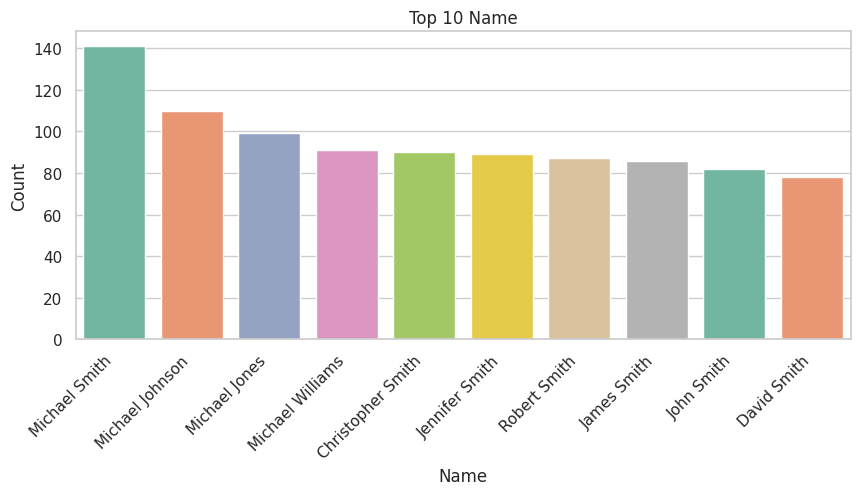

=== Name Counts (top 10 shown) ===
Name
Michael Smith        141
Michael Johnson      110
Michael Jones         99
Michael Williams      91
Christopher Smith     90
Jennifer Smith        89
Robert Smith          87
James Smith           86
John Smith            82
David Smith           78
Name: count, dtype: int64
Max: 141
Min: 1


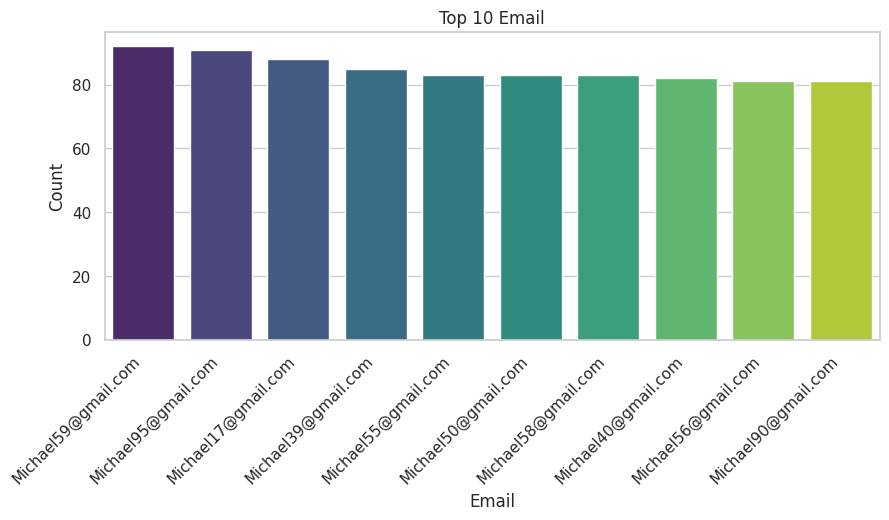

=== Email Counts (top 10 shown) ===
Email
Michael59@gmail.com    92
Michael95@gmail.com    91
Michael17@gmail.com    88
Michael39@gmail.com    85
Michael55@gmail.com    83
Michael50@gmail.com    83
Michael58@gmail.com    83
Michael40@gmail.com    82
Michael56@gmail.com    81
Michael90@gmail.com    81
Name: count, dtype: int64
Max: 92
Min: 1


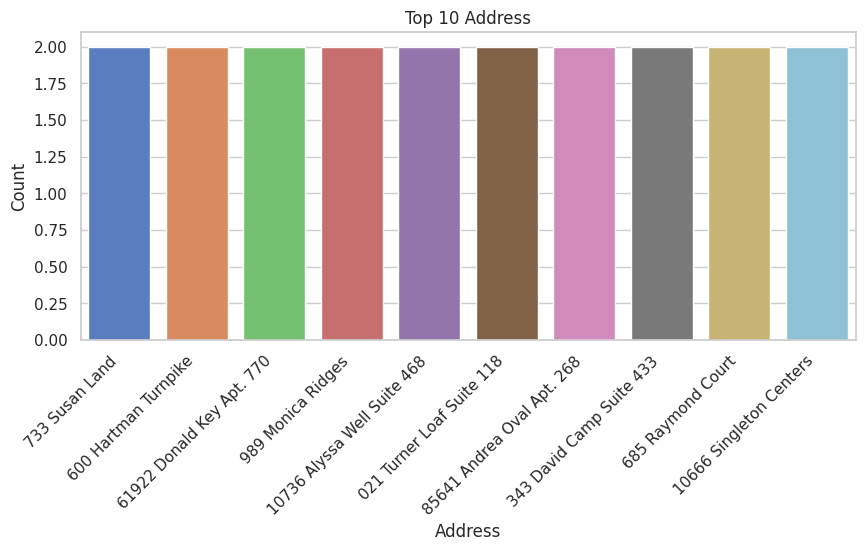

=== Address Counts (top 10 shown) ===
Address
733 Susan Land                 2
600 Hartman Turnpike           2
61922 Donald Key Apt. 770      2
989 Monica Ridges              2
10736 Alyssa Well Suite 468    2
021 Turner Loaf Suite 118      2
85641 Andrea Oval Apt. 268     2
343 David Camp Suite 433       2
685 Raymond Court              2
10666 Singleton Centers        2
Name: count, dtype: int64
Max: 2
Min: 1


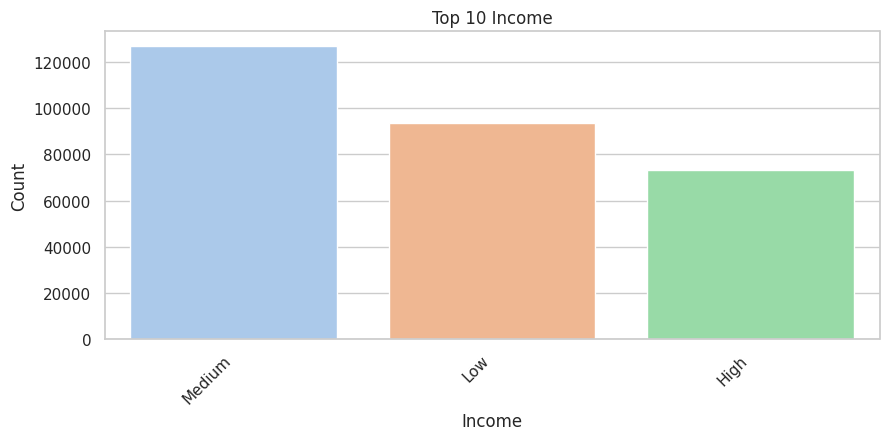

=== Income Counts (top 10 shown) ===
Income
Medium    126895
Low        93673
High       73343
Name: count, dtype: int64
Max: 126895
Min: 73343


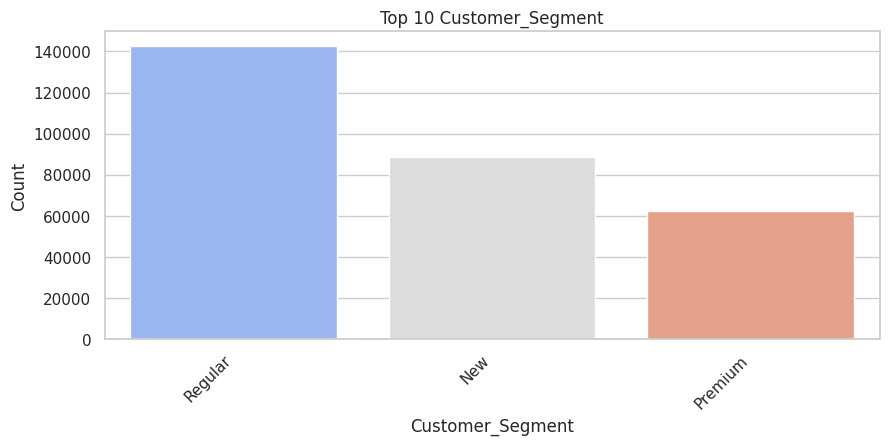

=== Customer_Segment Counts (top 10 shown) ===
Customer_Segment
Regular    142550
New         88764
Premium     62597
Name: count, dtype: int64
Max: 142550
Min: 62597


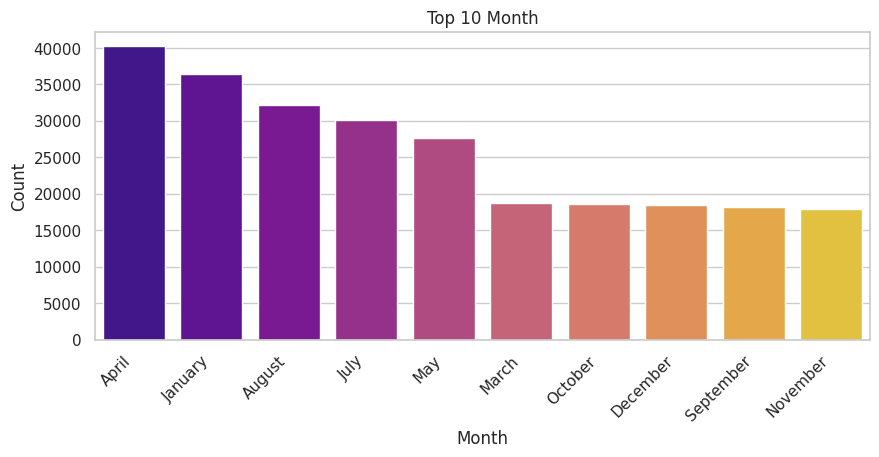

=== Month Counts (top 10 shown) ===
Month
April        40209
January      36422
August       32116
July         30059
May          27593
March        18653
October      18638
December     18453
September    18163
November     17919
Name: count, dtype: int64
Max: 40209
Min: 17774


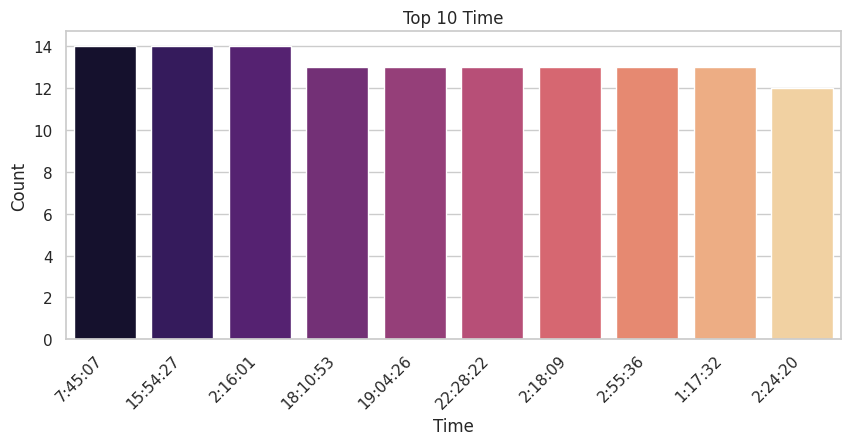

=== Time Counts (top 10 shown) ===
Time
7:45:07     14
15:54:27    14
2:16:01     14
18:10:53    13
19:04:26    13
22:28:22    13
2:18:09     13
2:55:36     13
1:17:32     13
2:24:20     12
Name: count, dtype: int64
Max: 14
Min: 1


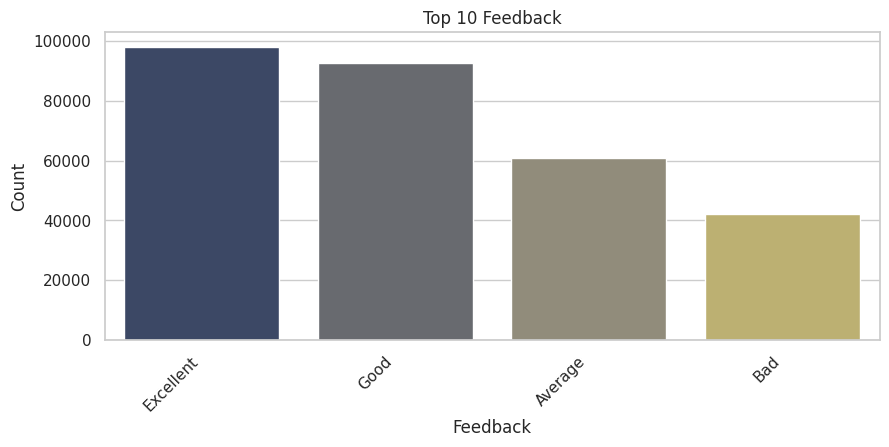

=== Feedback Counts (top 10 shown) ===
Feedback
Excellent    98016
Good         92696
Average      61019
Bad          42180
Name: count, dtype: int64
Max: 98016
Min: 42180


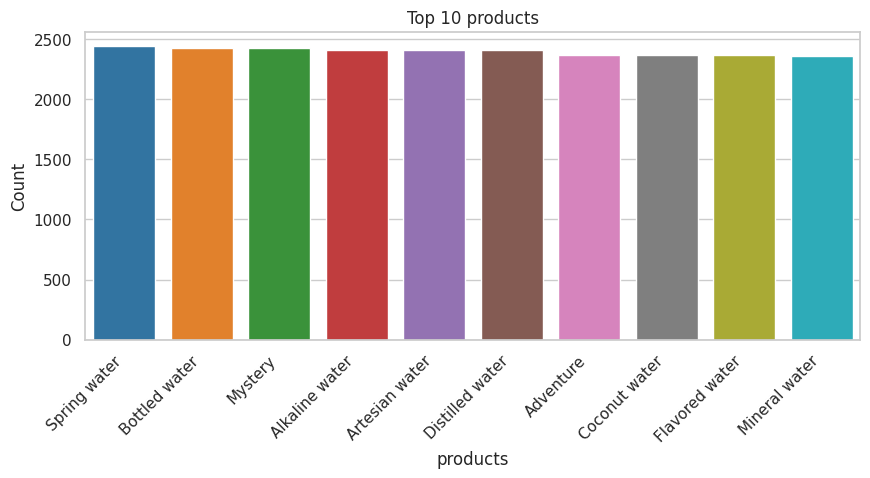

=== products Counts (top 10 shown) ===
products
Spring water       2441
Bottled water      2428
Mystery            2426
Alkaline water     2412
Artesian water     2410
Distilled water    2409
Adventure          2372
Coconut water      2366
Flavored water     2366
Mineral water      2361
Name: count, dtype: int64
Max: 2441
Min: 220


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# list of special categorical cols to show with custom behavior
special_cols = [
    'Gender','Country','City','State',
    'Payment_Method','Shipping_Method','Order_Status',
    'Product_Category','Product_Brand','Product_Type'
]

# palettes to cycle through (each plot will pick a different palette)
palettes = [
    "Set2", "viridis", "muted", "pastel", "coolwarm",
    "plasma", "magma", "cividis", "tab10", "tab20"
]
pal_cycle = itertools.cycle(palettes)

# Helper to show counts + max/min
def print_counts(col, counts):
    print(f"=== {col} Counts (top 10 shown) ===")
    print(counts.head(10))
    print("Max:", counts.max())
    print("Min:", counts.min())
    print("="*60)

# 1) Gender: bar + pie (if present)
if 'Gender' in df.columns:
    counts = df['Gender'].value_counts()
    pal = next(pal_cycle)
    plt.figure(figsize=(6,4))
    sns.countplot(x='Gender', data=df, order=counts.index, palette=pal)
    plt.title("Gender Distribution")
    plt.xticks(rotation=0)
    plt.show()

    plt.figure(figsize=(5,5))
    # use first N colors from palette for pie
    colors = sns.color_palette(pal, n_colors=len(counts))
    counts.plot.pie(autopct='%1.1f%%', colors=colors)
    plt.ylabel("")
    plt.title("Gender Split (Pie Chart)")
    plt.show()

    print_counts('Gender', counts)

# 2) Country / City / State → top 10
for col in ['Country','City','State']:
    if col in df.columns:
        counts = df[col].value_counts()
        top10 = counts.head(10)
        pal = next(pal_cycle)
        plt.figure(figsize=(10,5))
        sns.barplot(x=top10.index, y=top10.values, palette=pal)
        plt.title(f"Top 10 {col} by Frequency")
        plt.xticks(rotation=45, ha='right')
        plt.ylabel("Count")
        plt.show()
        print_counts(col, counts)

# 3) Payment_Method
if 'Payment_Method' in df.columns:
    counts = df['Payment_Method'].value_counts()
    pal = next(pal_cycle)
    plt.figure(figsize=(8,4))
    sns.countplot(x='Payment_Method', data=df, order=counts.index, palette=pal)
    plt.title("Preferred Payment Methods")
    plt.xticks(rotation=45, ha='right')
    plt.show()
    print_counts('Payment_Method', counts)

# 4) Shipping_Method
if 'Shipping_Method' in df.columns:
    counts = df['Shipping_Method'].value_counts()
    pal = next(pal_cycle)
    plt.figure(figsize=(8,4))
    sns.countplot(x='Shipping_Method', data=df, order=counts.index, palette=pal)
    plt.title("Preferred Shipping Methods")
    plt.xticks(rotation=45, ha='right')
    plt.show()
    print_counts('Shipping_Method', counts)

# 5) Order_Status
if 'Order_Status' in df.columns:
    counts = df['Order_Status'].value_counts()
    pal = next(pal_cycle)
    plt.figure(figsize=(8,4))
    sns.countplot(x='Order_Status', data=df, order=counts.index, palette=pal)
    plt.title("Order Status Distribution")
    plt.xticks(rotation=45, ha='right')
    plt.show()
    print_counts('Order_Status', counts)

# 6) Product_Category / Product_Brand / Product_Type → top 10
for col in ['Product_Category','Product_Brand','Product_Type']:
    if col in df.columns:
        counts = df[col].value_counts()
        top10 = counts.head(10)
        pal = next(pal_cycle)
        plt.figure(figsize=(12,5))
        sns.barplot(x=top10.index, y=top10.values, palette=pal)
        plt.title(f"Top 10 {col}")
        plt.xticks(rotation=45, ha='right')
        plt.ylabel("Count")
        plt.show()
        print_counts(col, counts)

# 7) Any other categorical columns not covered above: show top 10
all_cat_cols = df.select_dtypes(include=['object']).columns.tolist()
remaining = [c for c in all_cat_cols if c not in special_cols]
for col in remaining:
    counts = df[col].value_counts()
    top10 = counts.head(10)
    pal = next(pal_cycle)
    plt.figure(figsize=(10,4))
    sns.barplot(x=top10.index, y=top10.values, palette=pal)
    plt.title(f"Top 10 {col}")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Count")
    plt.show()
    print_counts(col, counts)



Bivariate and multivariate Analysis :

Using revenue column: Total_Amount
Top 5 Brands by Revenue:
 Product_Brand
Pepsi        4.042013e+07
Samsung      2.469212e+07
Sony         2.446911e+07
Coca-Cola    2.446867e+07
Nike         2.435496e+07
Name: Total_Amount, dtype: float64

Bottom 5 Brands by Revenue:
 Product_Brand
Apple         2.396481e+07
IKEA          2.390750e+07
Whirepool     9.884276e+06
Mitsubhisi    9.008944e+06
BlueStar      2.992519e+06
Name: Total_Amount, dtype: float64
------------------------------------------------------------


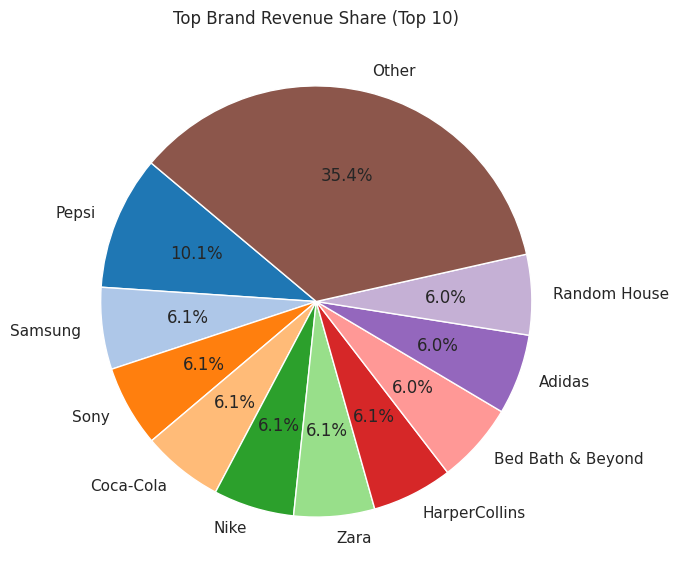

Top 5 Categories by Revenue:
 Product_Category
Electronics    9.501178e+07
Grocery        8.896615e+07
Clothing       7.293347e+07
Books          7.272673e+07
Home Decor     7.234013e+07
Name: Total_Amount, dtype: float64

Bottom 5 Categories by Revenue:
 Product_Category
Electronics    9.501178e+07
Grocery        8.896615e+07
Clothing       7.293347e+07
Books          7.272673e+07
Home Decor     7.234013e+07
Name: Total_Amount, dtype: float64
------------------------------------------------------------


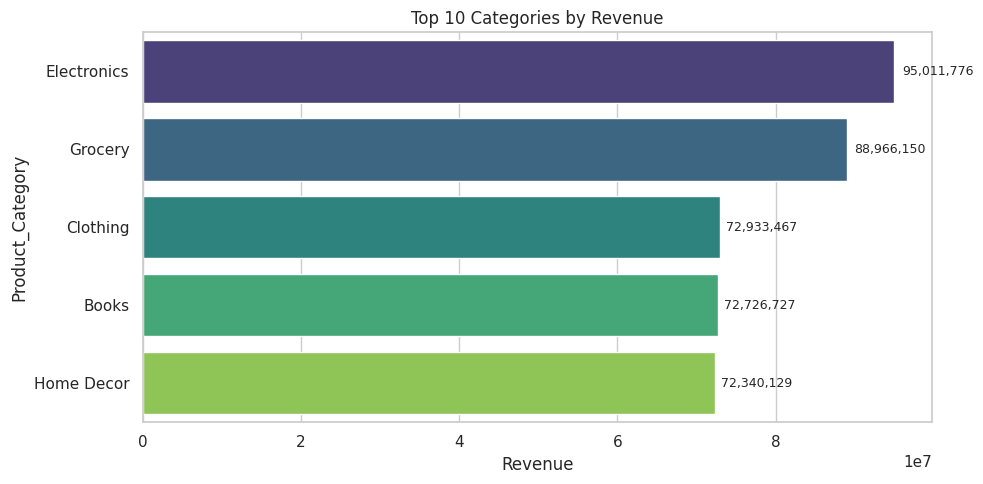

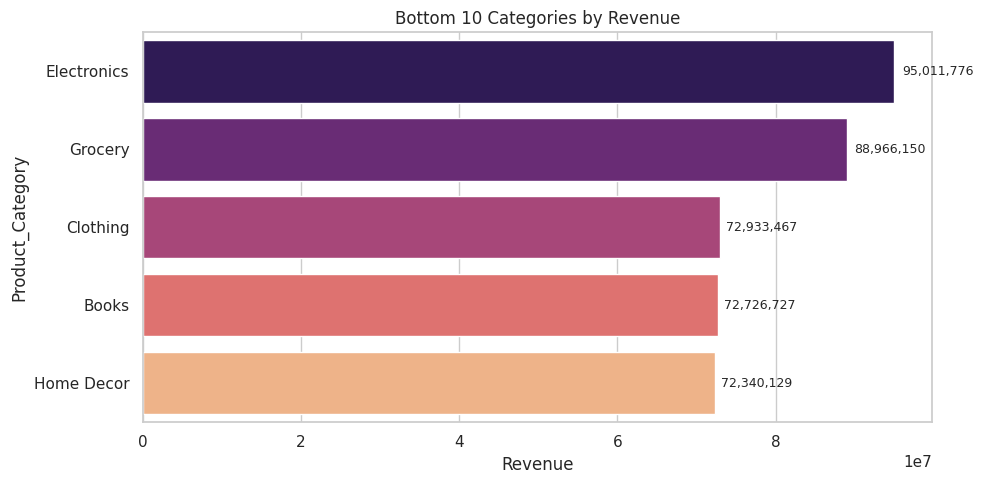

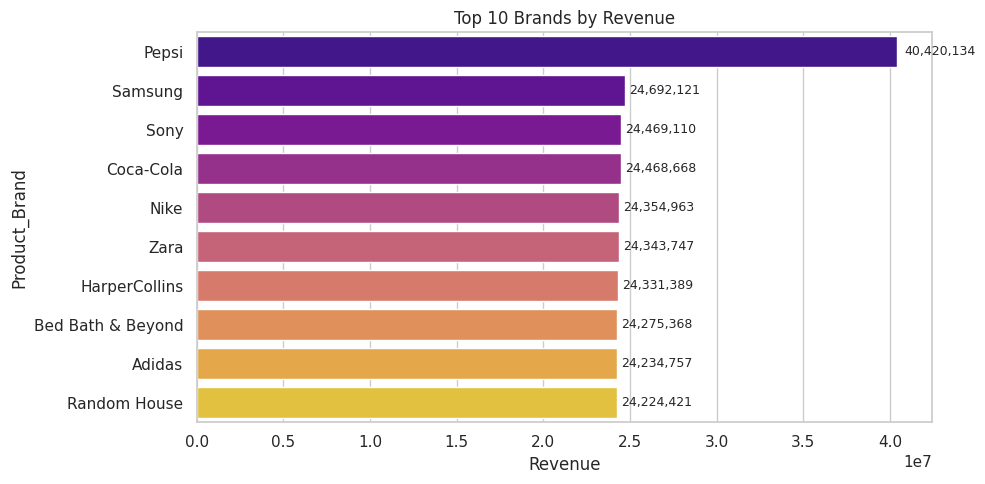

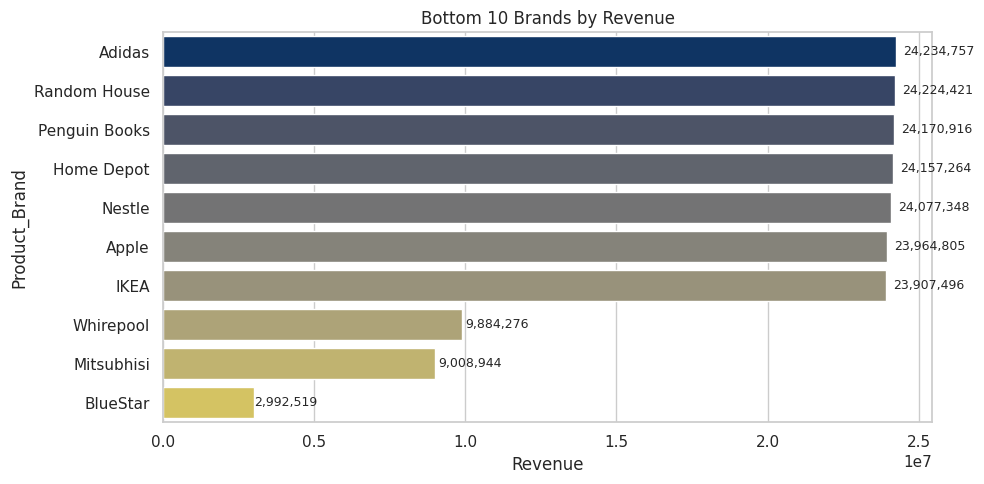

Top 5 Brands by Sales Volume:
 Product_Brand
Pepsi            29538
Coca-Cola        17951
HarperCollins    17901
Zara             17876
Samsung          17866
Name: count, dtype: int64

Bottom 5 Brands by Sales Volume:
 Product_Brand
Apple         17574
IKEA          17520
Whirepool      7289
Mitsubhisi     6580
BlueStar       2208
Name: count, dtype: int64
------------------------------------------------------------


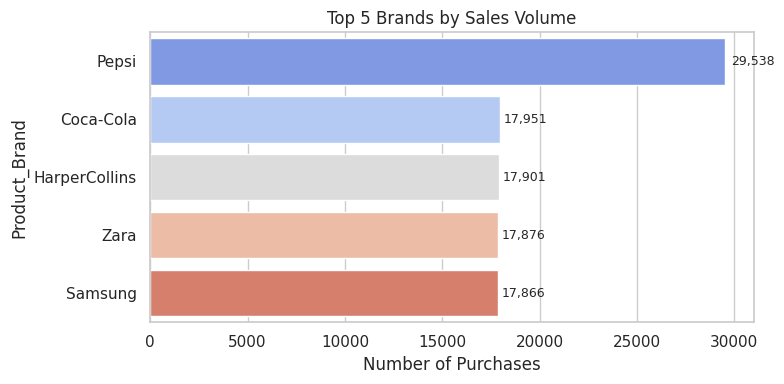

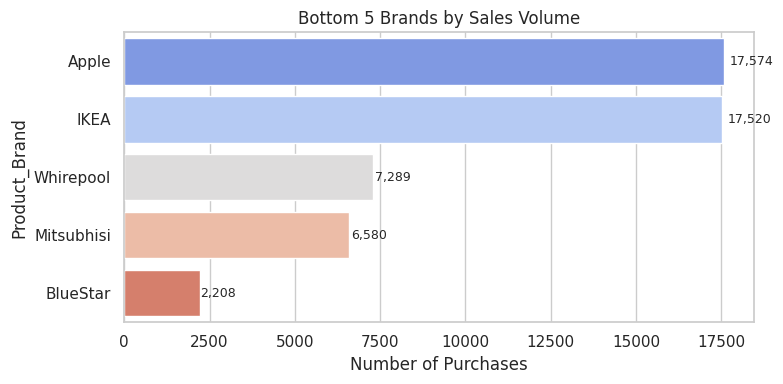

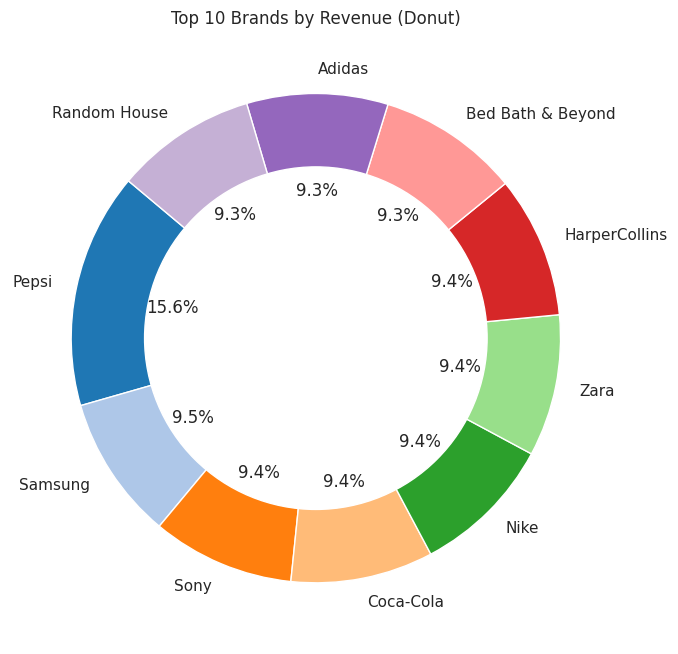

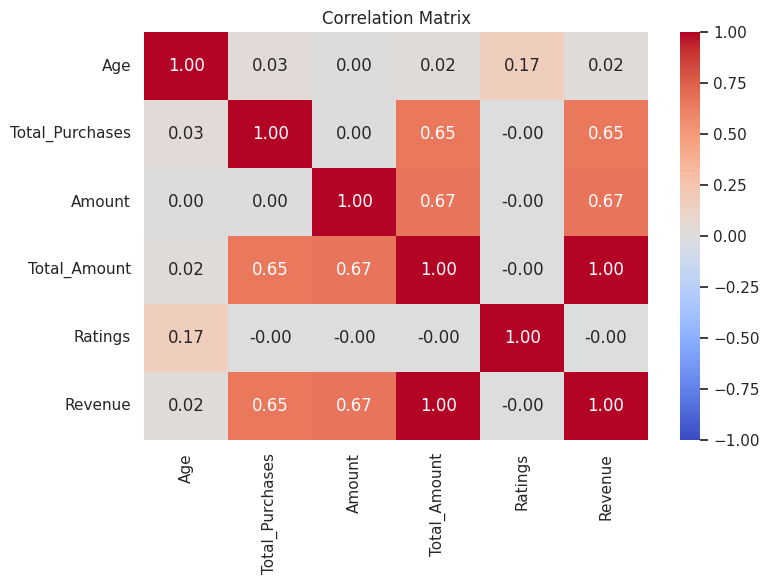

Correlation (Ratings vs Amount): -0.00046463768899646465


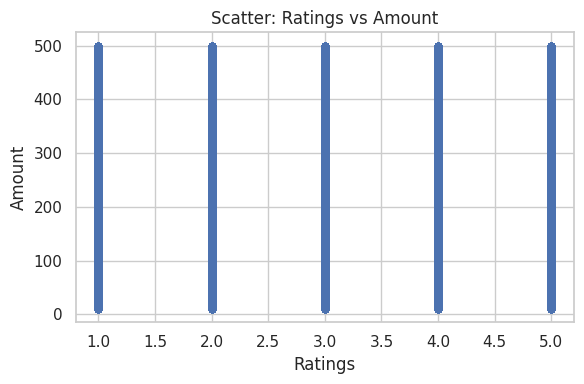

Correlation (Ratings vs Total_Amount): -0.003607463165045966


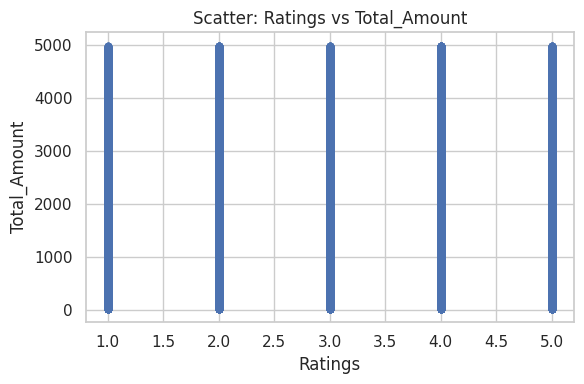

In [ ]:
# Combined Bivariate Analysis (clean, friend-style)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# --- Choose revenue column ---
rev_col = 'Total_Amount' if 'Total_Amount' in df.columns else ('Amount' if 'Amount' in df.columns else None)
if rev_col is None:
    raise ValueError("No 'Total_Amount' or 'Amount' column found in df to use as revenue.")
print("Using revenue column:", rev_col)
print("="*100)

# helper to annotate horizontal bar values
def annotate_hbars(ax, fmt="{:,}"):
    for p in ax.patches:
        w = p.get_width()
        ax.text(w + max(1, 0.01 * w), p.get_y() + p.get_height() / 2, fmt.format(int(round(w))), va='center', fontsize=9)

# 1) Brand share (pie) — Top 10 by revenue
if 'Product_Brand' in df.columns:
    brand_rev = df.groupby('Product_Brand')[rev_col].sum().sort_values(ascending=False)
    print("Top 5 Brands by Revenue:\n", brand_rev.head(5))
    print("\nBottom 5 Brands by Revenue:\n", brand_rev.tail(5))
    print("-"*60)

    # Pie for top 10 brand revenue share (aggregate the rest as Other)
    top_n = 10
    if len(brand_rev) > top_n:
        top = brand_rev.head(top_n)
        other = brand_rev.iloc[top_n:].sum()
        pie_vals = pd.concat([top, pd.Series({'Other': other})])
    else:
        pie_vals = brand_rev

    plt.figure(figsize=(7,7))
    colors = sns.color_palette('tab20', len(pie_vals))
    plt.pie(pie_vals.values, labels=pie_vals.index, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title("Top Brand Revenue Share (Top {})".format(top_n if len(brand_rev)>top_n else len(brand_rev)))
    plt.show()
else:
    print("No Product_Brand column found (skipping brand revenue pie).")
print("="*100)

# 2) Top 10 Categories by revenue and Bottom 10 (bar)
if 'Product_Category' in df.columns:
    cat_rev = df.groupby('Product_Category')[rev_col].sum().sort_values(ascending=False)
    print("Top 5 Categories by Revenue:\n", cat_rev.head(5))
    print("\nBottom 5 Categories by Revenue:\n", cat_rev.tail(5))
    print("-"*60)

    # Top 10 categories by revenue (bar with labels)
    top10 = cat_rev.head(10)
    plt.figure(figsize=(10,5))
    ax = sns.barplot(x=top10.values, y=top10.index, palette="viridis")
    plt.title("Top 10 Categories by Revenue")
    plt.xlabel("Revenue")
    annotate_hbars(ax, fmt="{:,}")
    plt.tight_layout()
    plt.show()

    # Bottom 10 categories by revenue
    bottom10 = cat_rev.tail(10)
    plt.figure(figsize=(10,5))
    ax = sns.barplot(x=bottom10.values, y=bottom10.index, palette="magma")
    plt.title("Bottom 10 Categories by Revenue")
    plt.xlabel("Revenue")
    annotate_hbars(ax, fmt="{:,}")
    plt.tight_layout()
    plt.show()
else:
    print("No Product_Category column found (skipping category revenue charts).")
print("="*100)

# 3) Top & Bottom 10 Brands by revenue (bar) and Top/Bottom 5 by volume
if 'Product_Brand' in df.columns:
    # revenue bars (top 10)
    topb = brand_rev.head(10)
    plt.figure(figsize=(10,5))
    ax = sns.barplot(x=topb.values, y=topb.index, palette="plasma")
    plt.title("Top 10 Brands by Revenue")
    plt.xlabel("Revenue")
    annotate_hbars(ax, fmt="{:,}")
    plt.tight_layout()
    plt.show()

    # bottom 10 by revenue
    bottomb = brand_rev.tail(10)
    plt.figure(figsize=(10,5))
    ax = sns.barplot(x=bottomb.values, y=bottomb.index, palette="cividis")
    plt.title("Bottom 10 Brands by Revenue")
    plt.xlabel("Revenue")
    annotate_hbars(ax, fmt="{:,}")
    plt.tight_layout()
    plt.show()

    # volume (counts) top 5 and bottom 5
    brand_vol = df['Product_Brand'].value_counts()
    print("Top 5 Brands by Sales Volume:\n", brand_vol.head(5))
    print("\nBottom 5 Brands by Sales Volume:\n", brand_vol.tail(5))
    print("-"*60)

    plt.figure(figsize=(8,4))
    ax = sns.barplot(x=brand_vol.head(5).values, y=brand_vol.head(5).index, palette="coolwarm")
    plt.title("Top 5 Brands by Sales Volume")
    plt.xlabel("Number of Purchases")
    annotate_hbars(ax)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8,4))
    ax = sns.barplot(x=brand_vol.tail(5).values, y=brand_vol.tail(5).index, palette="coolwarm")
    plt.title("Bottom 5 Brands by Sales Volume")
    plt.xlabel("Number of Purchases")
    annotate_hbars(ax)
    plt.tight_layout()
    plt.show()
else:
    print("No Product_Brand column found (skipping brand charts).")
print("="*100)

# 4) Donut chart for top 10 brands by revenue
if 'Product_Brand' in df.columns:
    topk = 10
    plot_vals = brand_rev.head(topk)
    plt.figure(figsize=(7,7))
    wedges, texts, autotexts = plt.pie(plot_vals.values, labels=plot_vals.index, autopct='%1.1f%%',
                                      startangle=140, colors=sns.color_palette('tab20', len(plot_vals)))
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(f"Top {topk} Brands by Revenue (Donut)")
    plt.tight_layout()
    plt.show()
else:
    pass
print("="*100)

# 5) Correlation heatmap for numeric columns (common set)
num_cols = [c for c in ['Age','Total_Purchases','Amount','Total_Amount','Ratings','Revenue'] if c in df.columns]
if len(num_cols) >= 2:
    corr = df[num_cols].corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
    plt.title("Correlation Matrix")
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns to plot correlation heatmap. Columns found:", num_cols)
print("="*100)

# 6) Scatter: Ratings vs Amount & Ratings vs Total_Amount (with correlation printed)
if 'Ratings' in df.columns and 'Amount' in df.columns:
    corr_ra = df['Ratings'].corr(df['Amount'])
    print("Correlation (Ratings vs Amount):", corr_ra)
    plt.figure(figsize=(6,4))
    plt.scatter(df['Ratings'], df['Amount'], alpha=0.5, s=20)
    plt.title("Scatter: Ratings vs Amount")
    plt.xlabel("Ratings")
    plt.ylabel("Amount")
    plt.tight_layout()
    plt.show()
else:
    print("Need both 'Ratings' and 'Amount' for the Ratings vs Amount scatter.")

if 'Ratings' in df.columns and rev_col in df.columns:
    corr_rt = df['Ratings'].corr(df[rev_col])
    print(f"Correlation (Ratings vs {rev_col}):", corr_rt)
    plt.figure(figsize=(6,4))
    plt.scatter(df['Ratings'], df[rev_col], alpha=0.5, s=20)
    plt.title(f"Scatter: Ratings vs {rev_col}")
    plt.xlabel("Ratings")
    plt.ylabel(rev_col)
    plt.tight_layout()
    plt.show()
else:
    print(f"Need both 'Ratings' and '{rev_col}' for the Ratings vs {rev_col} scatter.")
print("="*100)


rating vs sales

=== Ratings vs Avg Revenue (Category) ===
Correlation (Ratings vs Amount): 0.4579

Top 5 Categories by Avg Revenue:
   Product_Category   Ratings      Amount
2      Electronics  2.755548  257.870995
3          Grocery  2.728383  255.398713
1         Clothing  2.740995  255.331191
0            Books  2.726828  254.097846
4       Home Decor  2.738080  250.466750

Bottom 5 Categories by Avg Revenue:
   Product_Category   Ratings      Amount
4       Home Decor  2.738080  250.466750
0            Books  2.726828  254.097846
1         Clothing  2.740995  255.331191
3          Grocery  2.728383  255.398713
2      Electronics  2.755548  257.870995


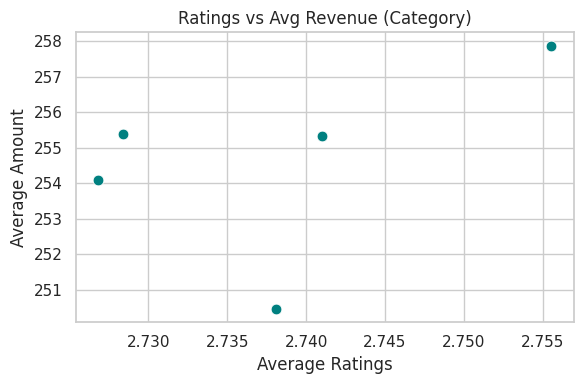

=== Ratings vs Avg Revenue (Brand) ===
Correlation (Ratings vs Amount): -0.1756

Top 5 Brands by Avg Revenue:
    Product_Brand   Ratings      Amount
12       Samsung  2.790856  261.460588
8           Nike  2.732995  260.254278
7         Nestle  2.658402  259.246999
11  Random House  2.703916  258.953370
1          Apple  2.636993  256.185530

Bottom 5 Brands by Avg Revenue:
        Product_Brand   Ratings      Amount
6               IKEA  2.746094  248.181350
9      Penguin Books  2.761036  250.038667
0             Adidas  2.768733  250.365936
3          Coca-Cola  2.767150  251.159719
2  Bed Bath & Beyond  2.682081  251.548465


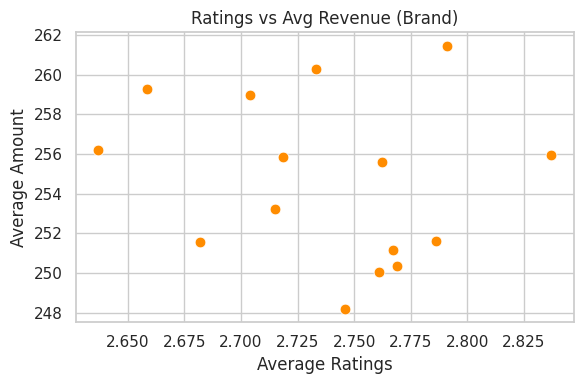

In [ ]:


import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot Ratings vs Avg Revenue (Category)
if {'Product_Category','Ratings','Amount'}.issubset(df.columns):
    cat_group = df.groupby('Product_Category')[['Ratings','Amount']].mean().reset_index()

    # Print details
    print("=== Ratings vs Avg Revenue (Category) ===")
    print("Correlation (Ratings vs Amount):", round(cat_group['Ratings'].corr(cat_group['Amount']), 4))
    print("\nTop 5 Categories by Avg Revenue:\n", cat_group.nlargest(5, 'Amount')[['Product_Category','Ratings','Amount']])
    print("\nBottom 5 Categories by Avg Revenue:\n", cat_group.nsmallest(5, 'Amount')[['Product_Category','Ratings','Amount']])
    print("="*60)

    # Plot
    plt.figure(figsize=(6,4))
    sns.scatterplot(x='Ratings', y='Amount', data=cat_group, s=60, color="teal")
    plt.title("Ratings vs Avg Revenue (Category)")
    plt.xlabel("Average Ratings")
    plt.ylabel("Average Amount")
    plt.tight_layout()
    plt.show()

# 12. Scatterplot Ratings vs Avg Revenue (Brand)
if {'Product_Brand','Ratings','Amount'}.issubset(df.columns):
    brand_group = df.groupby('Product_Brand')[['Ratings','Amount']].mean().reset_index()

    # Print details
    print("=== Ratings vs Avg Revenue (Brand) ===")
    print("Correlation (Ratings vs Amount):", round(brand_group['Ratings'].corr(brand_group['Amount']), 4))
    print("\nTop 5 Brands by Avg Revenue:\n", brand_group.nlargest(5, 'Amount')[['Product_Brand','Ratings','Amount']])
    print("\nBottom 5 Brands by Avg Revenue:\n", brand_group.nsmallest(5, 'Amount')[['Product_Brand','Ratings','Amount']])
    print("="*60)

    # Plot
    plt.figure(figsize=(6,4))
    sns.scatterplot(x='Ratings', y='Amount', data=brand_group, s=60, color="darkorange")
    plt.title("Ratings vs Avg Revenue (Brand)")
    plt.xlabel("Average Ratings")
    plt.ylabel("Average Amount")
    plt.tight_layout()
    plt.show()


=== Ratings by Category ===
                      mean  min  max
Product_Category                    
Electronics       2.755548  1.0  5.0
Clothing          2.740995  1.0  5.0
Home Decor        2.738080  1.0  5.0
Grocery           2.728383  1.0  5.0
Books             2.726828  1.0  5.0

Lowest 5 Categories by avg rating:
                      mean  min  max
Product_Category                    
Electronics       2.755548  1.0  5.0
Clothing          2.740995  1.0  5.0
Home Decor        2.738080  1.0  5.0
Grocery           2.728383  1.0  5.0
Books             2.726828  1.0  5.0


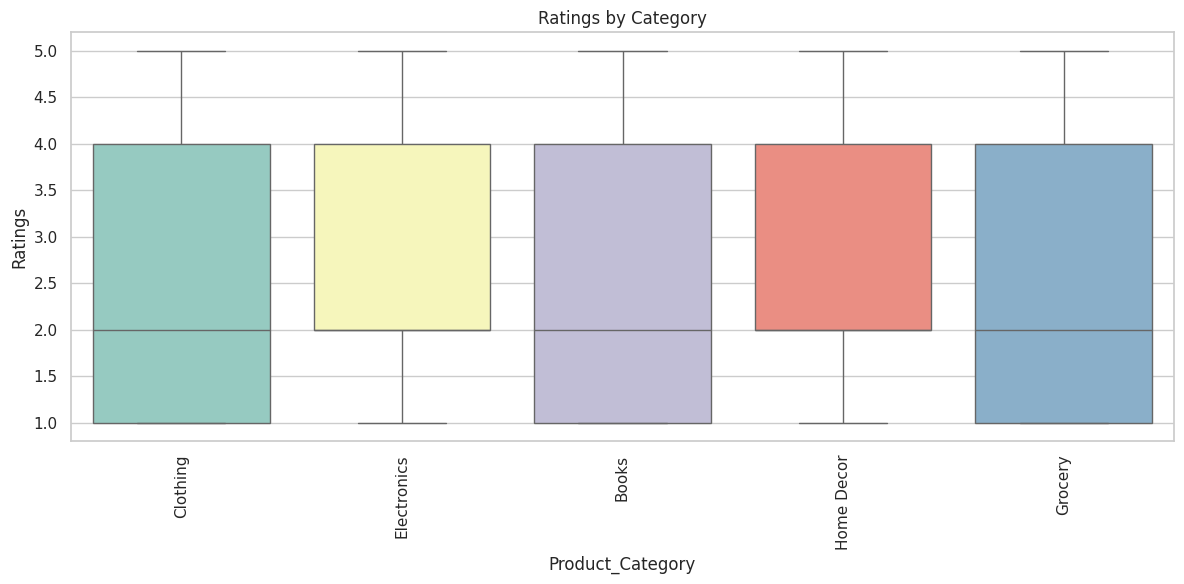

=== Ratings by Top 10 Brands ===
                       mean  min  max
Product_Brand                        
Sony               2.837073  1.0  5.0
Samsung            2.790856  1.0  5.0
Home Depot         2.785988  1.0  5.0
Adidas             2.768733  1.0  5.0
Coca-Cola          2.767150  1.0  5.0
Pepsi              2.762172  1.0  5.0
Penguin Books      2.761036  1.0  5.0
Random House       2.703916  1.0  5.0
Bed Bath & Beyond  2.682081  1.0  5.0
Nestle             2.658402  1.0  5.0


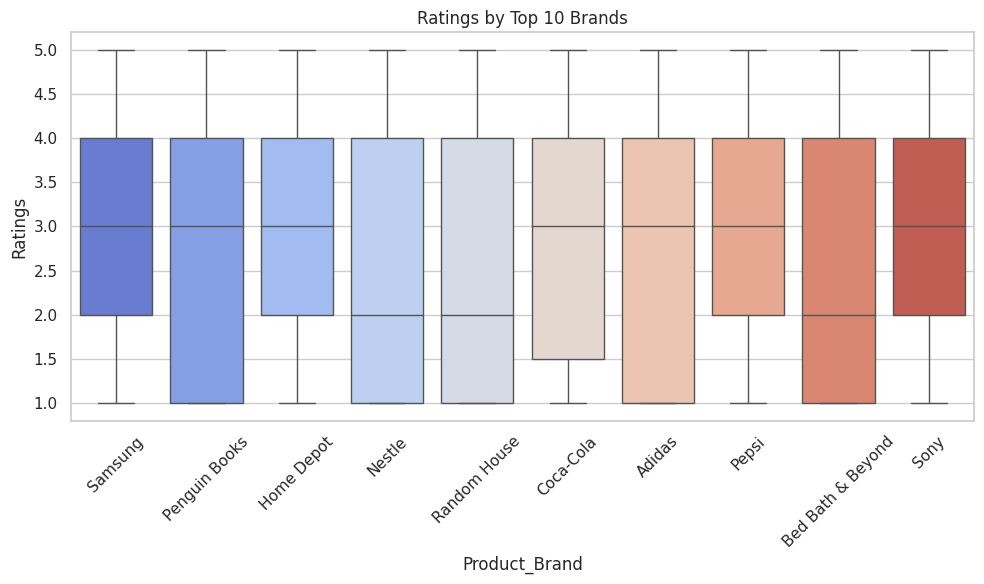

In [ ]:


# 13. Boxplot Ratings by Category
if {'Product_Category','Ratings'}.issubset(df.columns):
    print("=== Ratings by Category ===")
    cat_stats = df.groupby('Product_Category')['Ratings'].agg(['mean','min','max']).sort_values('mean', ascending=False)
    print(cat_stats.head(5))   # Top 5 categories by avg rating
    print("\nLowest 5 Categories by avg rating:")
    print(cat_stats.tail(5))
    print("="*60)

    plt.figure(figsize=(12,6))
    sns.boxplot(x='Product_Category', y='Ratings', data=df, palette="Set3")
    plt.title("Ratings by Category")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# 14. Boxplot Ratings by Top 10 Brands
if {'Product_Brand','Ratings'}.issubset(df.columns):
    top_brands = df['Product_Brand'].value_counts().head(10).index
    print("=== Ratings by Top 10 Brands ===")
    brand_stats = df[df['Product_Brand'].isin(top_brands)].groupby('Product_Brand')['Ratings'].agg(['mean','min','max']).sort_values('mean', ascending=False)
    print(brand_stats)
    print("="*60)

    plt.figure(figsize=(10,6))
    sns.boxplot(x='Product_Brand', y='Ratings',
                data=df[df['Product_Brand'].isin(top_brands)],
                palette="coolwarm")
    plt.title("Ratings by Top 10 Brands")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


=== Correlation Matrix ===
                  Ratings    Amount  Total_Purchases       Age
Ratings          1.000000 -0.004953        -0.008540 -0.006253
Amount          -0.004953  1.000000         0.020913  0.008518
Total_Purchases -0.008540  0.020913         1.000000  0.003876
Age             -0.006253  0.008518         0.003876  1.000000


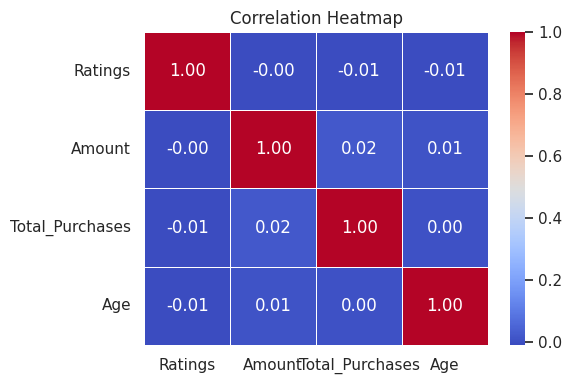

In [ ]:


import seaborn as sns
import matplotlib.pyplot as plt

# Pick only the numeric columns you want
cols = ['Ratings','Amount','Total_Purchases','Age']
num_cols = [c for c in cols if c in df.columns]

if len(num_cols) >= 2:
    corr = df[num_cols].corr()

    print("=== Correlation Matrix ===")
    print(corr)
    print("="*60)

    plt.figure(figsize=(6,4))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns found for correlation heatmap.")


=== Category vs Gender Revenue (Sum) ===
Gender                  Female          Male
Product_Category                            
Books             5.228552e+06  8.341055e+06
Clothing          5.238600e+06  8.343395e+06
Electronics       6.176987e+06  1.153940e+07
Grocery           6.476082e+06  1.015390e+07
Home Decor        5.261896e+06  8.232492e+06


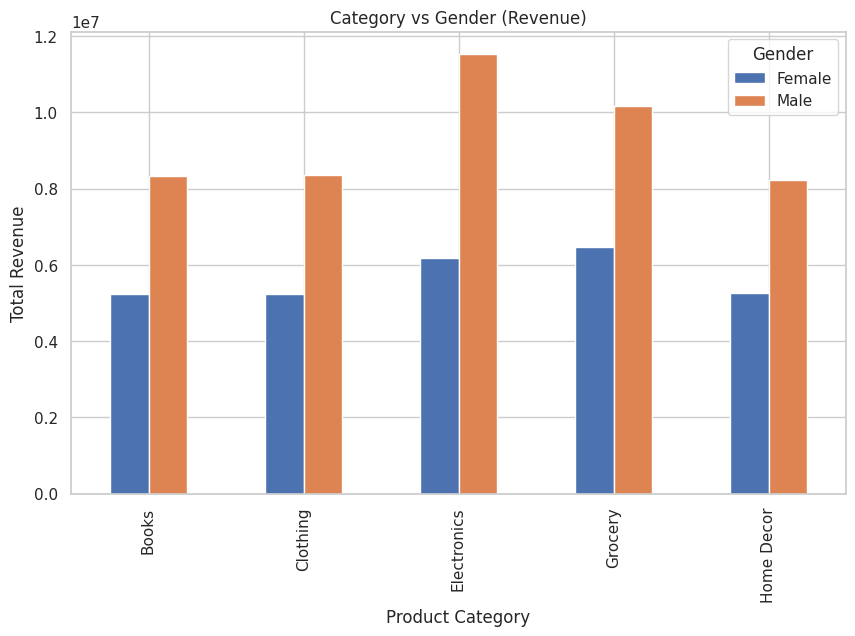

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Group revenue by category and gender
category_gender_revenue = df.groupby(['Product_Category', 'Gender'])['Amount'].sum().unstack()

# Print summary table (like correlation matrix output)
print("=== Category vs Gender Revenue (Sum) ===")
print(category_gender_revenue)

# Plot the grouped bar chart
category_gender_revenue.plot(kind='bar', figsize=(10,6))
plt.title("Category vs Gender (Revenue)")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.legend(title="Gender")
plt.show()


=== Category vs Customer Segment Revenue (Sum) ===
Customer_Segment           New       Premium       Regular
Product_Category                                          
Books             4.167130e+06  2.781692e+06  6.620785e+06
Clothing          4.168480e+06  2.790034e+06  6.623480e+06
Electronics       5.012781e+06  3.787759e+06  8.915850e+06
Grocery           5.143335e+06  3.842923e+06  7.643726e+06
Home Decor        4.109461e+06  2.775492e+06  6.609435e+06


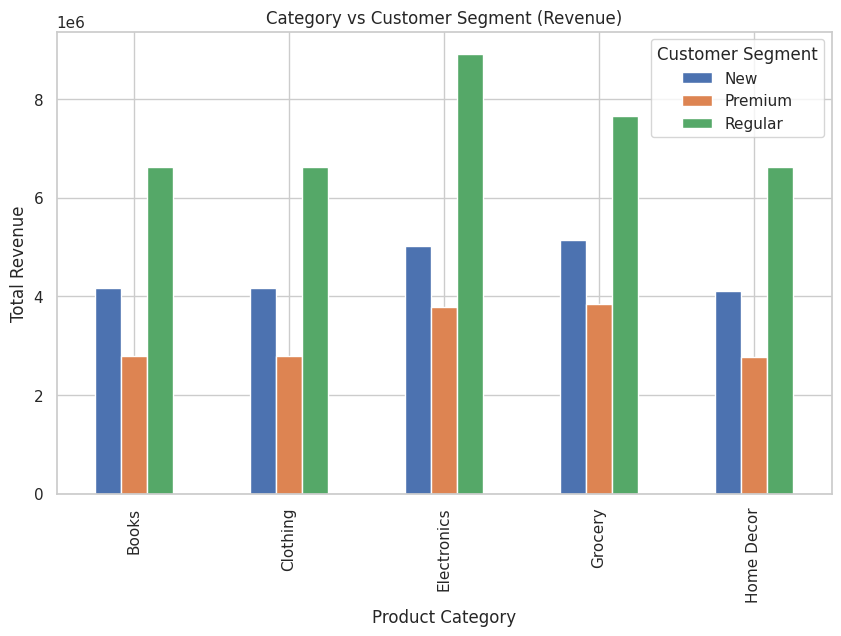

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Group revenue by category and customer segment
category_segment_revenue = df.groupby(['Product_Category','Customer_Segment'])['Amount'].sum().unstack()

# Print summary table (matrix style)
print("=== Category vs Customer Segment Revenue (Sum) ===")
print(category_segment_revenue)

# Plot grouped bar chart
category_segment_revenue.plot(kind='bar', figsize=(10,6))
plt.title("Category vs Customer Segment (Revenue)")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.legend(title="Customer Segment")
plt.show()


=== Category × Segment Revenue (Sum) ===
Customer_Segment           New       Premium       Regular
Product_Category                                          
Books             4.167130e+06  2.781692e+06  6.620785e+06
Clothing          4.168480e+06  2.790034e+06  6.623480e+06
Electronics       5.012781e+06  3.787759e+06  8.915850e+06
Grocery           5.143335e+06  3.842923e+06  7.643726e+06
Home Decor        4.109461e+06  2.775492e+06  6.609435e+06


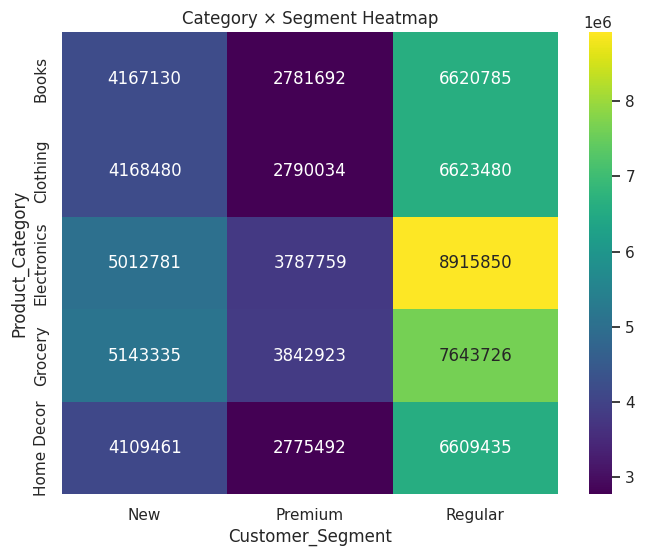


=== Top Brands × Segment Revenue (Sum) ===
Customer_Segment           New       Premium       Regular
Product_Brand                                             
Adidas            1.379946e+06  9.147115e+05  2.228852e+06
Penguin Books     1.392185e+06  9.343211e+05  2.179006e+06
Pepsi             2.396336e+06  1.943005e+06  3.209094e+06
Samsung           1.399808e+06  9.697432e+05  2.219841e+06
Zara              1.404733e+06  9.492143e+05  2.197889e+06


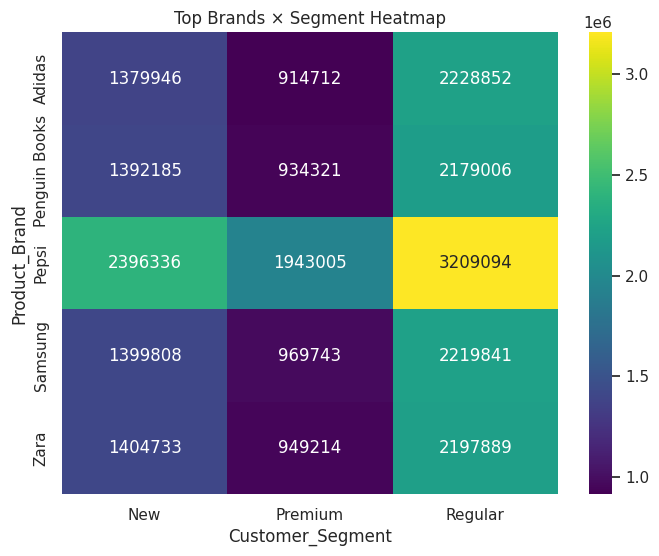

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap: Category × Segment
pivot1 = df.pivot_table(values='Amount', index='Product_Category', columns='Customer_Segment', aggfunc='sum')

print("=== Category × Segment Revenue (Sum) ===")
print(pivot1)

plt.figure(figsize=(8,6))
sns.heatmap(pivot1, annot=True, fmt=".0f", cmap="viridis")
plt.title("Category × Segment Heatmap")
plt.show()


# Heatmap: Brand × Segment (Top 10 brands)
pivot2 = df[df['Product_Brand'].isin(top_brands)].pivot_table(values='Amount', index='Product_Brand', columns='Customer_Segment', aggfunc='sum')

print("\n=== Top Brands × Segment Revenue (Sum) ===")
print(pivot2)

plt.figure(figsize=(8,6))
sns.heatmap(pivot2, annot=True, fmt=".0f", cmap="viridis")
plt.title("Top Brands × Segment Heatmap")
plt.show()


Original rows: 293911 => After dropping bad dates: 178205

=== Gender counts by Product_Category ===
Gender            Female   Male
Product_Category               
Books              12559  19645
Clothing           12536  19884
Electronics        14524  27497
Grocery            15329  24214
Home Decor         12573  19444

=== Gender % by Product_Category ===
Gender            Female   Male
Product_Category               
Books              39.00  61.00
Clothing           38.67  61.33
Electronics        34.56  65.44
Grocery            38.77  61.23
Home Decor         39.27  60.73


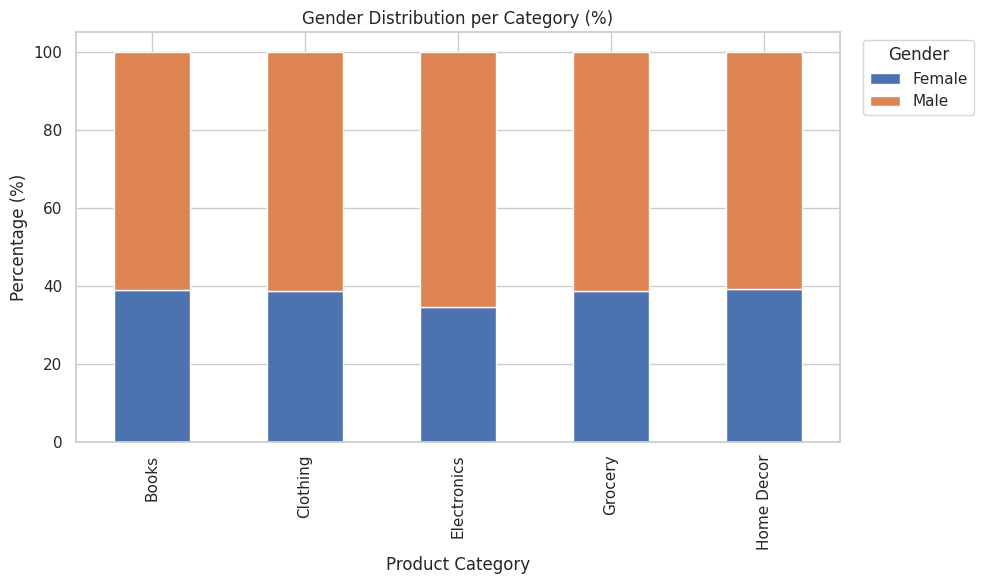


Top 5 categories by total revenue: ['Electronics', 'Grocery', 'Clothing', 'Books', 'Home Decor']

=== Monthly revenue for Top 5 categories (first 12 rows) ===
Product_Category  Electronics    Grocery   Clothing      Books  Home Decor
Month                                                                     
2023-03             916394.11  867866.37  705342.10  703181.84   718581.60
2023-04             911582.46  822402.01  670265.11  677258.51   641932.59
2023-05             890672.07  858826.86  705176.64  718390.04   684551.11
2023-06             881459.13  818715.25  671555.77  661067.37   645219.30
2023-07             904951.31  856452.17  691240.57  701728.83   702475.45
2023-08             929704.23  876344.99  704596.43  696055.78   686819.97
2023-09             842553.50  787759.64  711597.28  666386.70   678963.52
2023-10             911031.10  870062.79  699902.32  715399.35   684807.72
2023-11             873109.89  842901.06  676871.15  665551.41   655613.73
2023-12        

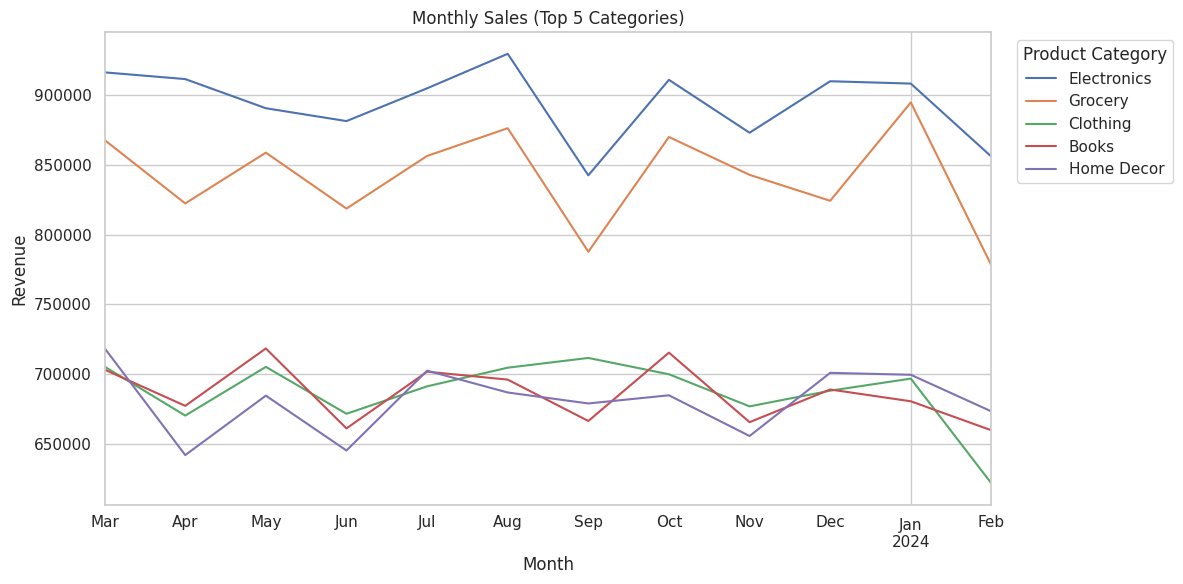

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Convert to datetime (robust) and drop bad dates
df['Date_converted'] = pd.to_datetime(df['Date'], errors='coerce', infer_datetime_format=True)
df_cleaned = df.dropna(subset=['Date_converted']).copy()

print("Original rows:", len(df), "=> After dropping bad dates:", len(df_cleaned))

# 2) Stacked % bar: Gender distribution per Category
gender_cat = df_cleaned.groupby(['Product_Category', 'Gender']).size().unstack(fill_value=0)

print("\n=== Gender counts by Product_Category ===")
print(gender_cat)

# Convert to percentage (per category)
gender_cat_pct = (gender_cat.T / gender_cat.T.sum()).T * 100
print("\n=== Gender % by Product_Category ===")
print(gender_cat_pct.round(2))

# Plot stacked percentage bar
ax = gender_cat_pct.plot(kind='bar', stacked=True, figsize=(10,6))
ax.set_ylabel("Percentage (%)")
ax.set_xlabel("Product Category")
ax.set_title("Gender Distribution per Category (%)")
plt.legend(title="Gender", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 3) Monthly sales by category (Top 5 categories)
# Create period (year-month) for grouping
df_cleaned['Month'] = df_cleaned['Date_converted'].dt.to_period('M')

# Pivot table: monthly revenue per category
monthly_cat = df_cleaned.pivot_table(values='Amount', index='Month', columns='Product_Category', aggfunc='sum', fill_value=0)

# Identify top 5 categories by total revenue
top5_categories = monthly_cat.sum().sort_values(ascending=False).head(5).index.tolist()
print("\nTop 5 categories by total revenue:", top5_categories)

# Print monthly totals for top 5 (text output)
print("\n=== Monthly revenue for Top 5 categories (first 12 rows) ===")
print(monthly_cat[top5_categories].head(12).round(2))

# Plot monthly trends for top 5 categories
plt.figure(figsize=(12,6))
monthly_cat[top5_categories].plot(ax=plt.gca())
plt.title("Monthly Sales (Top 5 Categories)")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.legend(title="Product Category", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


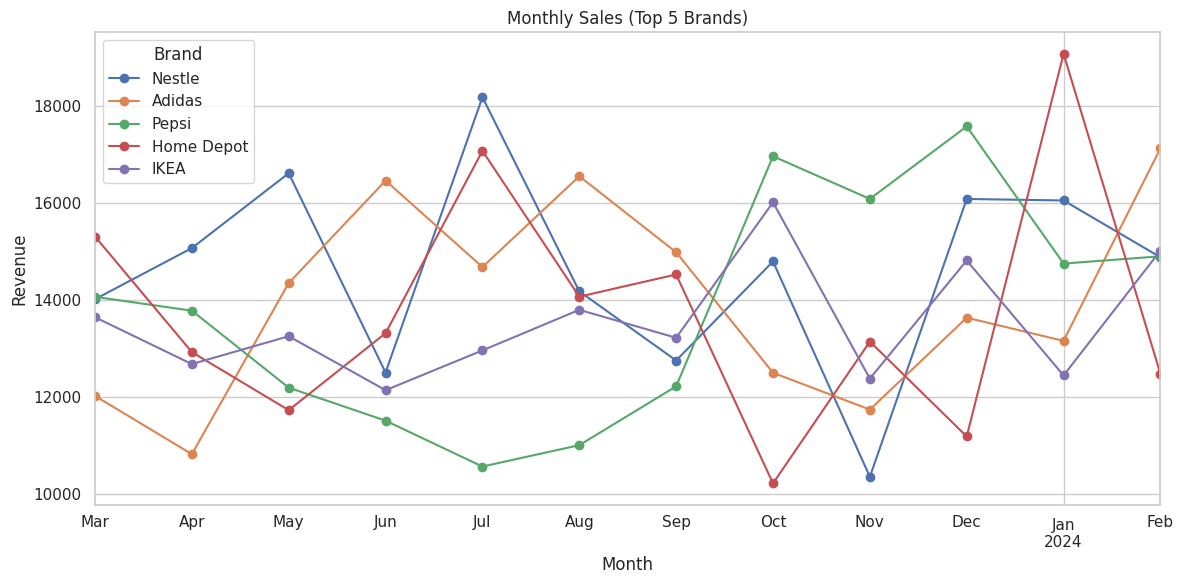

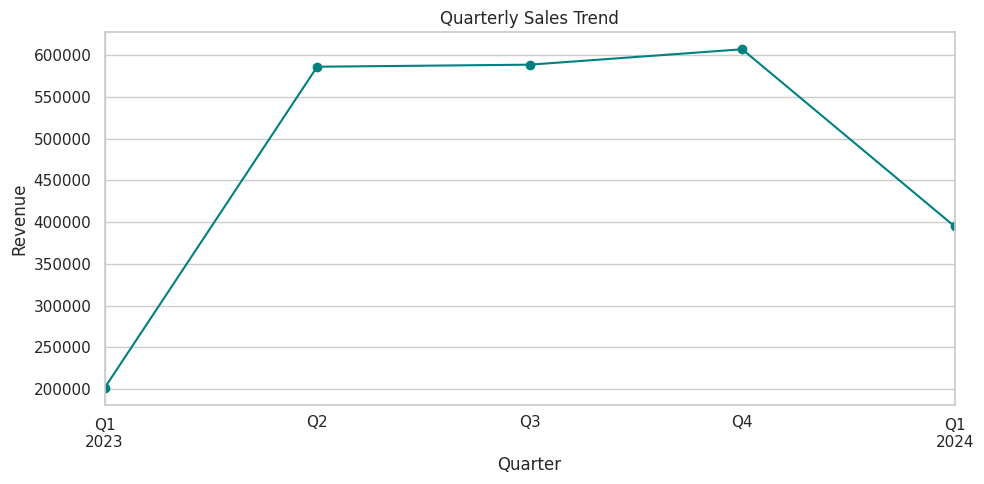

In [ ]:
# Make sure Date is datetime
if 'Date' in df.columns and not np.issubdtype(df['Date'].dtype, np.datetime64):
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Use a clean reference
df_time = df.copy()
df_time = df_time.dropna(subset=['Date'])

# 1. Monthly sales by brand (Top 5 brands)
if {'Product_Brand','Amount','Date'}.issubset(df_time.columns):
    # Find top 5 brands overall by revenue
    top_brands = df_time.groupby('Product_Brand')['Amount'].sum().nlargest(5).index

    # Group monthly by brand
    monthly_brand = df_time.groupby([df_time['Date'].dt.to_period('M'),'Product_Brand'])['Amount'].sum().unstack().fillna(0)

    # Plot only top 5 brands
    monthly_brand[top_brands].plot(figsize=(12,6), marker='o')
    plt.title("Monthly Sales (Top 5 Brands)")
    plt.xlabel("Month")
    plt.ylabel("Revenue")
    plt.legend(title="Brand")
    plt.tight_layout()
    plt.show()

# 2. Quarterly sales trend
if {'Amount','Date'}.issubset(df_time.columns):
    quarterly = df_time.groupby(df_time['Date'].dt.to_period('Q'))['Amount'].sum()

    plt.figure(figsize=(10,5))
    quarterly.plot(kind='line', marker='o', color="teal")
    plt.title("Quarterly Sales Trend")
    plt.xlabel("Quarter")
    plt.ylabel("Revenue")
    plt.tight_layout()
    plt.show()

=== Correlation Table (Numeric Columns) ===
                 Transaction_ID  Customer_ID   Phone  Zipcode     Age    Year  \
Transaction_ID           1.0000       0.0092  0.0021   0.0048  0.0165 -0.0082   
Customer_ID              0.0092       1.0000  0.0138   0.0001 -0.0027 -0.0087   
Phone                    0.0021       0.0138  1.0000   0.0001 -0.0040  0.0256   
Zipcode                  0.0048       0.0001  0.0001   1.0000  0.0042  0.0081   
Age                      0.0165      -0.0027 -0.0040   0.0042  1.0000 -0.0052   
Year                    -0.0082      -0.0087  0.0256   0.0081 -0.0052  1.0000   
Total_Purchases          0.0057       0.0126 -0.0068   0.0018  0.0039  0.0048   
Amount                   0.0001       0.0023  0.0027  -0.0057  0.0085  0.0082   
Total_Amount             0.0015       0.0087 -0.0048  -0.0029  0.0071  0.0030   
Ratings                 -0.0089      -0.0026  0.0009  -0.0260 -0.0063 -0.0022   
Revenue                  0.0015       0.0087 -0.0048  -0.0029  0.

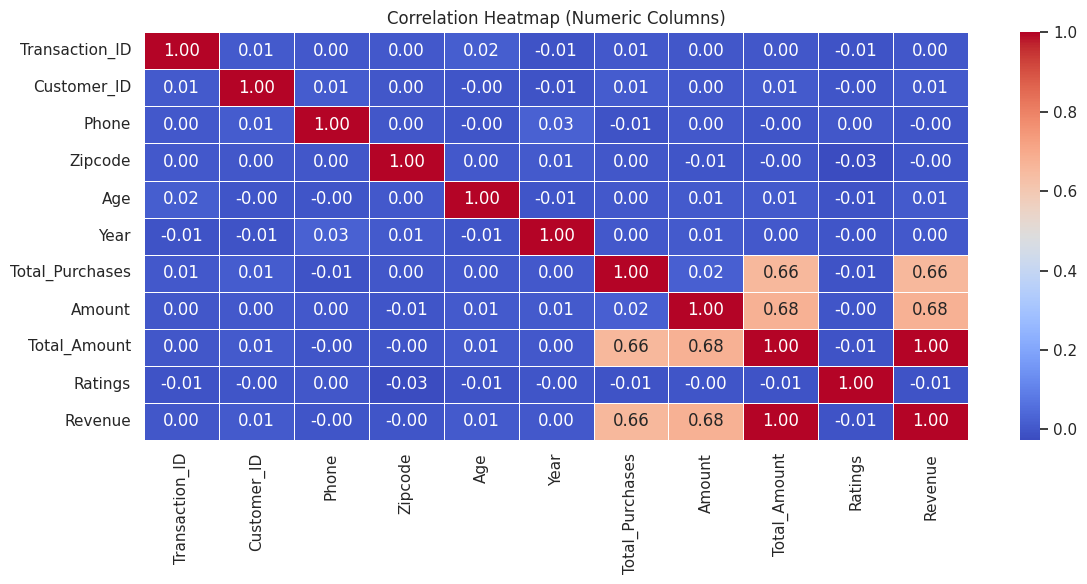

In [ ]:
# ===============================
# BLOCK: Correlation Heatmap (All Numeric Columns)
# ===============================

import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation for numeric-only columns
corr = df.corr(numeric_only=True)

# Print correlation table
print("=== Correlation Table (Numeric Columns) ===")
print(corr.round(4))   # round to 4 decimals for readability
print("="*60)

# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Columns)")
plt.tight_layout()
plt.show()


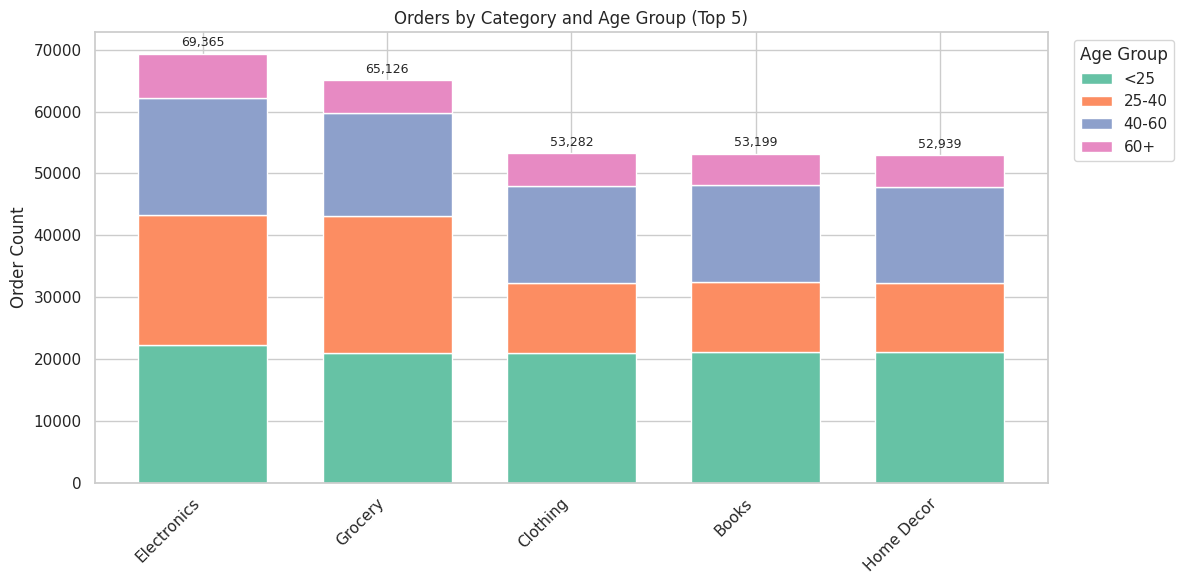

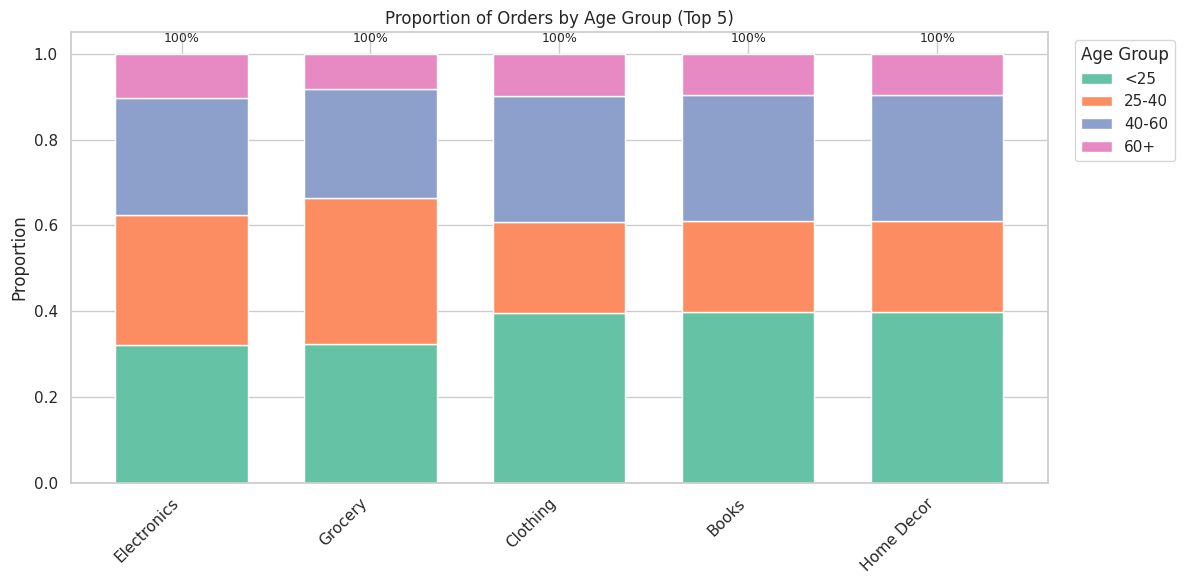

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# --- Build crosstab (Category × Age_Group) ---
bins = [0,25,40,60,100]
labels = ["<25","25-40","40-60","60+"]
df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

cross2 = pd.crosstab(df["Product_Category"], df["Age_Group"]).fillna(0)

# --- Choose top N categories to plot (avoid clutter) ---
top_n = 5
top_categories = cross2.sum(axis=1).nlargest(top_n).index
cross2_top = cross2.loc[top_categories]

# Ensure columns (age groups) in desired order
age_order = ["<25","25-40","40-60","60+"]
cols = [c for c in age_order if c in cross2_top.columns]
cross2_top = cross2_top[cols]

# --- Plot stacked bar with explicit x positions ---
positions = np.arange(len(cross2_top))
width = 0.7

colors = sns.color_palette("Set2", n_colors=len(cols))
bottom = np.zeros(len(cross2_top))

fig, ax = plt.subplots(figsize=(12,6))
for i, col in enumerate(cols):
    vals = cross2_top[col].values
    bars = ax.bar(positions, vals, width, bottom=bottom, label=col, color=colors[i])
    bottom += vals

# xticks and labels
ax.set_xticks(positions)
ax.set_xticklabels(cross2_top.index, rotation=45, ha='right')
ax.set_ylabel("Order Count")
ax.set_title(f"Orders by Category and Age Group (Top {top_n})")
ax.legend(title="Age Group", bbox_to_anchor=(1.02, 1), loc='upper left')

# Annotate totals above each stacked bar
totals = cross2_top.sum(axis=1).values
y_offset = max(totals) * 0.01
for x, total in zip(positions, totals):
    ax.text(x, total + y_offset, f"{int(total):,}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# --- Normalized stacked bar (percentages) ---
cross2_top_pct = cross2_top.div(cross2_top.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(12,6))
bottom = np.zeros(len(cross2_top_pct))
for i, col in enumerate(cols):
    vals = cross2_top_pct[col].values
    ax.bar(positions, vals, width, bottom=bottom, label=col, color=colors[i])
    bottom += vals

ax.set_xticks(positions)
ax.set_xticklabels(cross2_top_pct.index, rotation=45, ha='right')
ax.set_ylabel("Proportion")
ax.set_title(f"Proportion of Orders by Age Group (Top {top_n})")
ax.legend(title="Age Group", bbox_to_anchor=(1.02, 1), loc='upper left')

# Annotate percentages (show 100% on top)
for x in positions:
    ax.text(x, 1.02, "100%", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


Category × Age Group Table:
 Age_Group           <25  25-40  40-60   60+
Product_Category                           
Books             21641  11584  16119  5246
Clothing          21566  11597  16126  5414
Electronics       22802  21561  19480  7310
Grocery           21542  22662  17135  5416
Home Decor        21640  11448  16012  5253


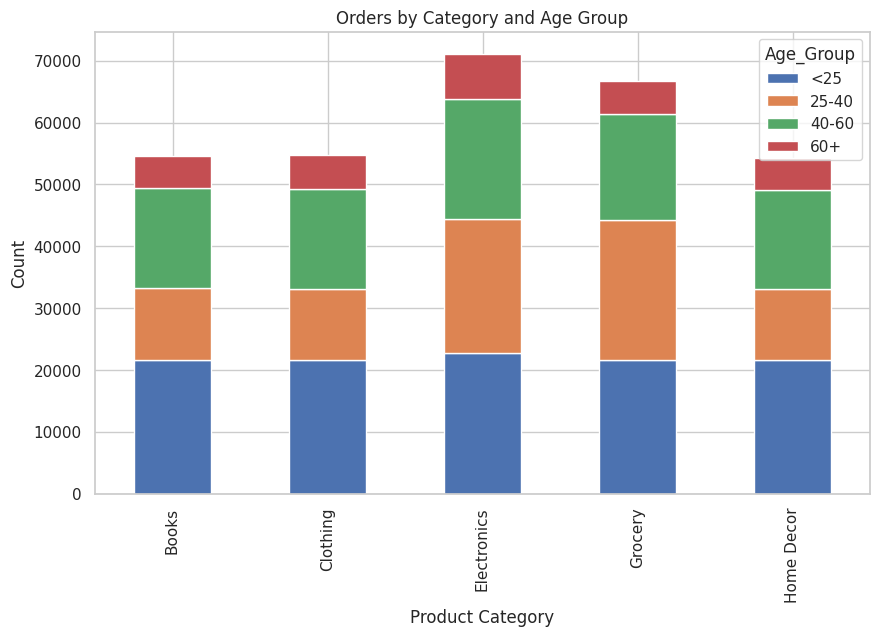

In [ ]:
#Category × Age Group
bins = [0,25,40,60,100]
labels = ["<25","25-40","40-60","60+"]
retail["Age_Group"] = pd.cut(retail["Age"], bins=bins, labels=labels, right=False)

cross2 = pd.crosstab(retail["Product_Category"], retail["Age_Group"])
print("Category × Age Group Table:\n", cross2.head())

cross2.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Orders by Category and Age Group")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.show()

Category × Customer Segment (Counts):
 Customer_Segment    New  Premium  Regular
Product_Category                         
Books             16748    11284    26555
Clothing          16740    11345    26613
Electronics       20258    15124    35764
Grocery           20707    15361    30673
Home Decor        16645    11207    26488


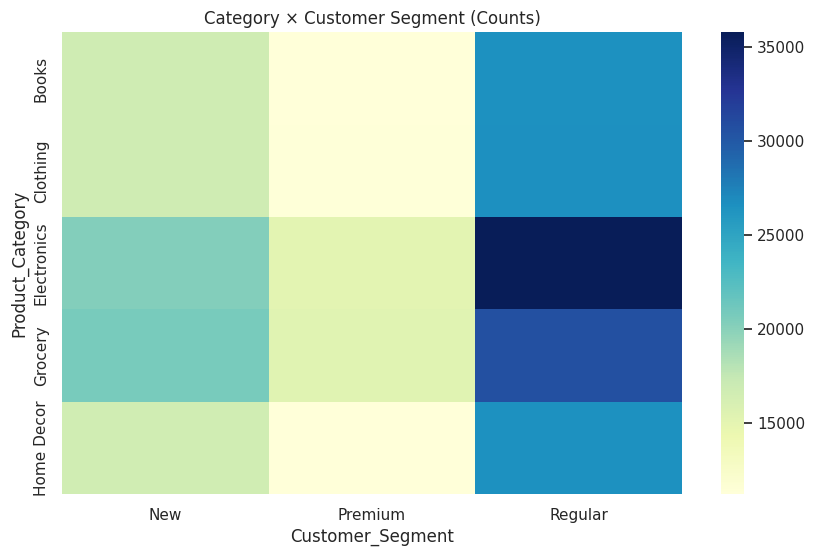

In [ ]:
# Category × Customer Segment (Counts)
cross3 = pd.crosstab(retail["Product_Category"], retail["Customer_Segment"])
print("Category × Customer Segment (Counts):\n", cross3.head())

plt.figure(figsize=(10,6))
sns.heatmap(cross3, cmap="YlGnBu", annot=False)
plt.title("Category × Customer Segment (Counts)")
plt.show()

Category × Customer Segment (Revenue):
 Customer_Segment           New       Premium       Regular
Product_Category                                          
Books             2.294649e+07  1.520797e+07  3.636566e+07
Clothing          2.311183e+07  1.540902e+07  3.623718e+07
Electronics       2.763755e+07  2.086760e+07  4.881855e+07
Grocery           2.814014e+07  2.099689e+07  4.188455e+07
Home Decor        2.264326e+07  1.511164e+07  3.647825e+07


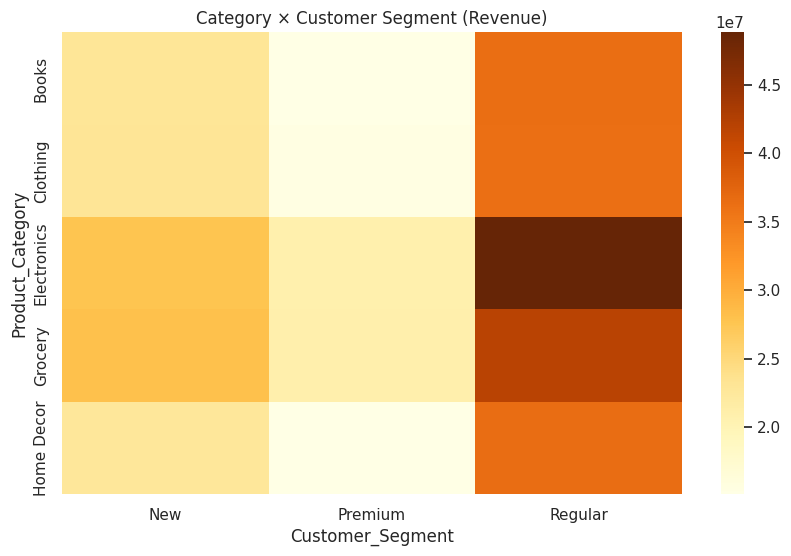

In [ ]:
#Category × Customer Segment (Revenue)
cross4 = retail.pivot_table(index="Product_Category", columns="Customer_Segment", values="Total_Amount", aggfunc="sum")
print("Category × Customer Segment (Revenue):\n", cross4.head())

plt.figure(figsize=(10,6))
sns.heatmap(cross4, cmap="YlOrBr", annot=False)
plt.title("Category × Customer Segment (Revenue)")
plt.show()

Category Composition Across Segments (%):
 Customer_Segment       New   Premium   Regular
Product_Category                              
Books             0.306813  0.206716  0.486471
Clothing          0.306044  0.207412  0.486544
Electronics       0.284738  0.212577  0.502685
Grocery           0.310259  0.230158  0.459583
Home Decor        0.306312  0.206238  0.487449


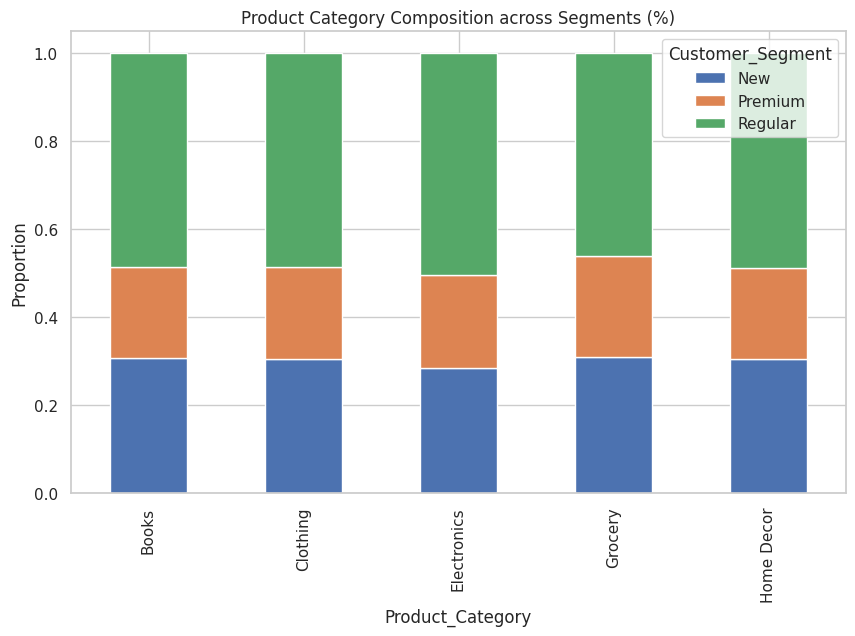

In [ ]:
# Category Composition Across Segments (%)
cross_pct = cross3.div(cross3.sum(axis=1), axis=0)
print("Category Composition Across Segments (%):\n", cross_pct.head())

cross_pct.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Product Category Composition across Segments (%)")
plt.ylabel("Proportion")
plt.show()

=== Daily Revenue (First 5 rows) ===
Date
2023-03-13    49979.810310
2023-03-14    51262.925308
2023-03-15    56708.498573
2023-03-16    50550.545622
2023-03-17    50118.938608
Name: Total_Amount, dtype: float64


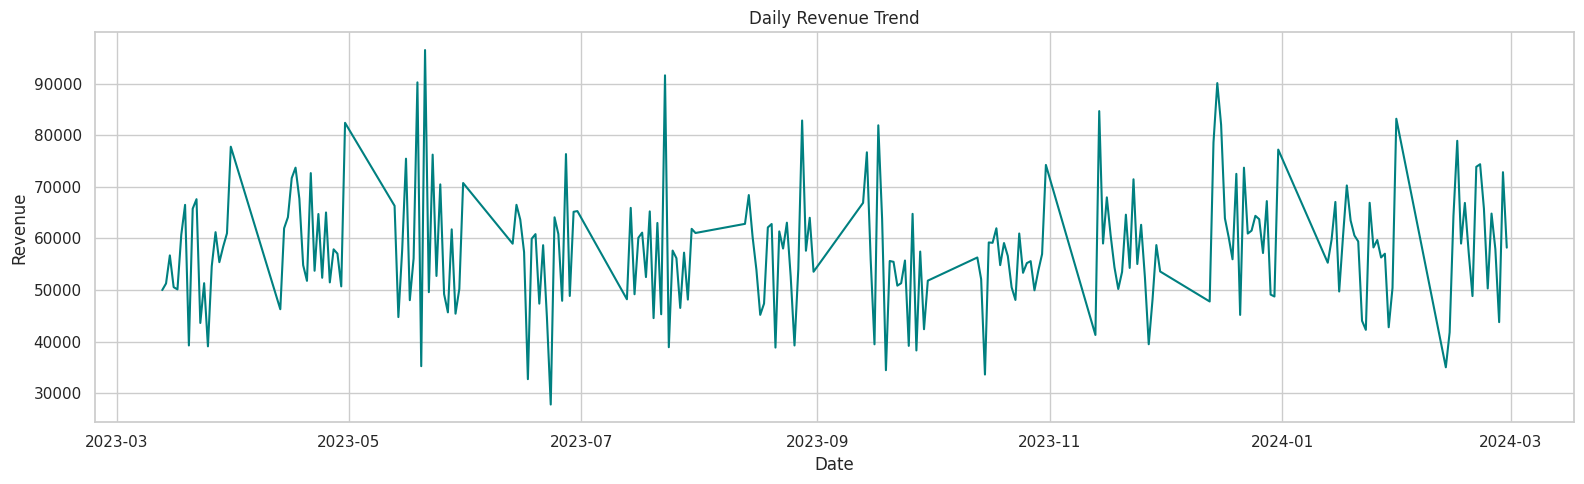

In [ ]:
# ===============================
# BLOCK: Daily Revenue Trend
# ===============================

import matplotlib.pyplot as plt

# Make sure Date is datetime
retail1["Date"] = pd.to_datetime(retail1["Date"], errors="coerce", dayfirst=True)

# Group by Date and sum revenue
if {"Date","Total_Amount"}.issubset(retail1.columns):
    daily_rev = retail1.groupby("Date")["Total_Amount"].sum()

    print("=== Daily Revenue (First 5 rows) ===")
    print(daily_rev.head())
    print("="*60)

    # Plot trend
    plt.figure(figsize=(16,5))
    plt.plot(daily_rev.index, daily_rev.values, color="teal", linewidth=1.5)
    plt.title("Daily Revenue Trend")
    plt.xlabel("Date")
    plt.ylabel("Revenue")
    plt.tight_layout()
    plt.show()
else:
    print("Columns 'Date' and 'Total_Amount' not found in retail1.")


<Figure size 1400x600 with 0 Axes>

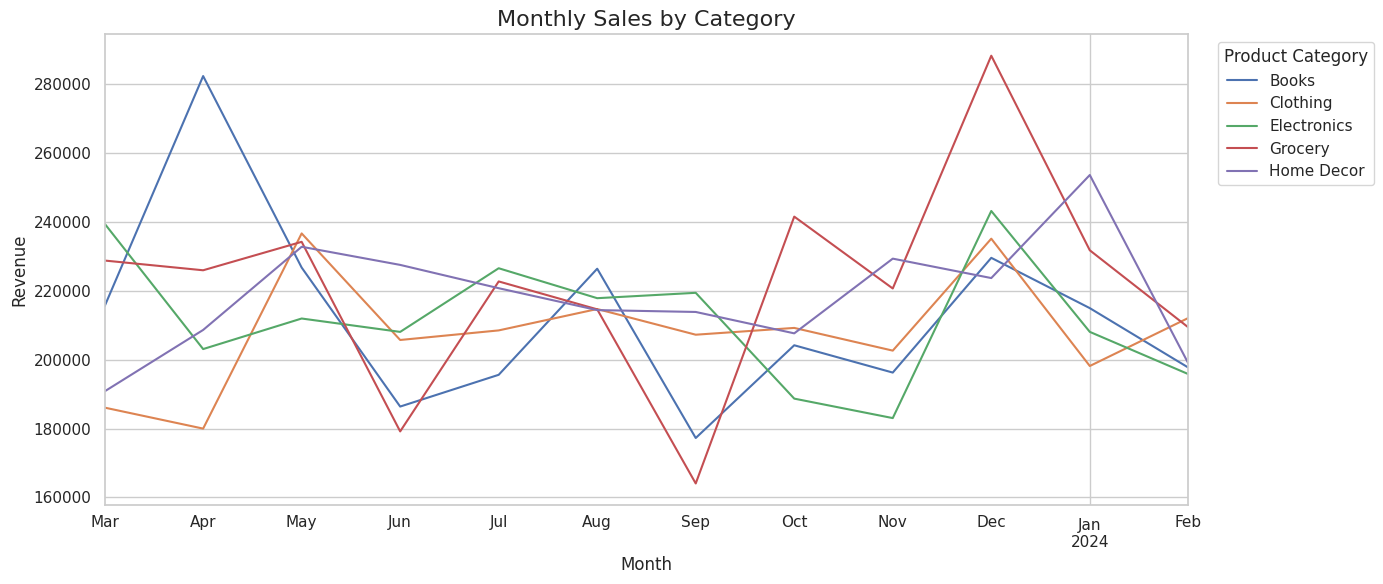

In [ ]:
# ===============================
# BLOCK: Monthly Sales per Category
# ===============================

import matplotlib.pyplot as plt

# Ensure Date is datetime
retail1["Date"] = pd.to_datetime(retail1["Date"], errors="coerce")

# Group by Month × Product_Category
if {"Date","Product_Category","Total_Amount"}.issubset(retail1.columns):
    monthly_cat = (
        retail1.groupby([retail1["Date"].dt.to_period("M"), "Product_Category"])["Total_Amount"]
        .sum()
        .unstack(fill_value=0)
    )

    # Plot
    plt.figure(figsize=(14,6))
    monthly_cat.plot(figsize=(14,6))
    plt.title("Monthly Sales by Category", fontsize=16)
    plt.xlabel("Month")
    plt.ylabel("Revenue")
    plt.legend(title="Product Category", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()
else:
    print("Required columns not found in retail1 (need Date, Product_Category, Total_Amount).")


=== Quarterly Revenue (First 5 rows) ===
Date
2023Q1    1.060854e+06
2023Q2    3.249788e+06
2023Q3    3.144438e+06
2023Q4    3.303649e+06
2024Q1    2.120856e+06
Freq: Q-DEC, Name: Total_Amount, dtype: float64


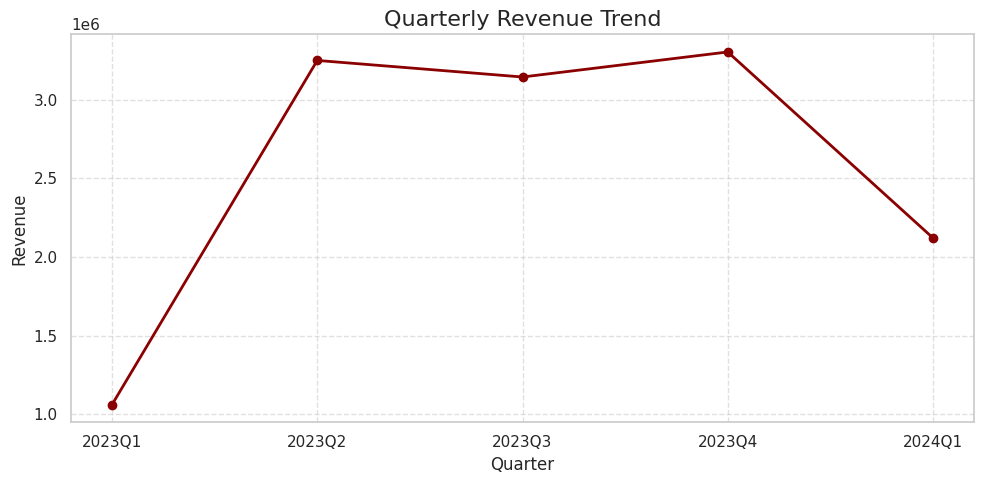

In [ ]:
# ===============================
# BLOCK: Quarterly Revenue Trend
# ===============================

import matplotlib.pyplot as plt

# Ensure Date is datetime
retail1["Date"] = pd.to_datetime(retail1["Date"], errors="coerce")

# Group by Quarter and sum revenue
if {"Date","Total_Amount"}.issubset(retail1.columns):
    quarterly_rev = retail1.groupby(retail1["Date"].dt.to_period("Q"))["Total_Amount"].sum()

    print("=== Quarterly Revenue (First 5 rows) ===")
    print(quarterly_rev.head())
    print("="*60)

    # Plot
    plt.figure(figsize=(10,5))
    plt.plot(quarterly_rev.index.astype(str), quarterly_rev.values,
             marker="o", color="darkred", linewidth=2)
    plt.title("Quarterly Revenue Trend", fontsize=16)
    plt.xlabel("Quarter")
    plt.ylabel("Revenue")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("Columns 'Date' and 'Total_Amount' not found in retail1.")


# Phase 4: Special **Operations**


--- Temporal analysis (Year) ---

Total Revenue per Year (first rows):
Year
2023.0    3.358360e+08
2024.0    6.614229e+07
Name: Revenue, dtype: float64


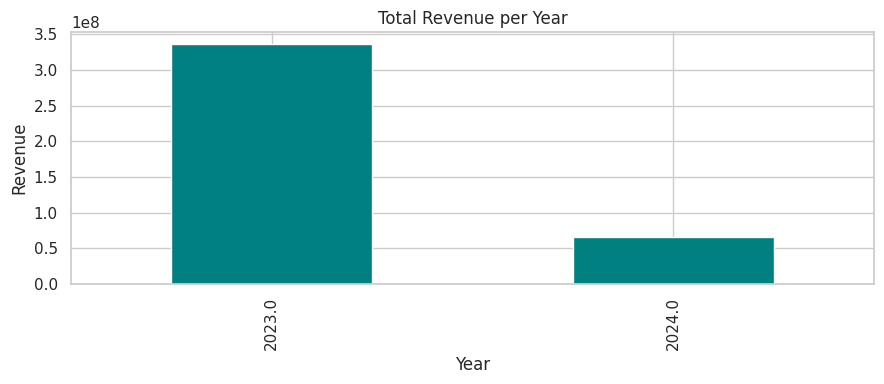


Average Ratings per Year (first rows):
Year
2023.0    3.163086
2024.0    3.158329
Name: Ratings, dtype: float64


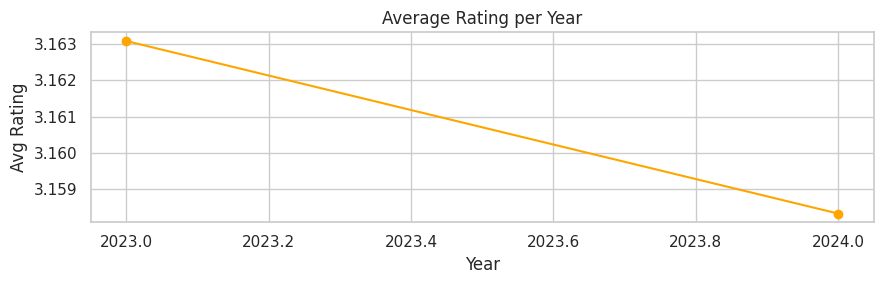


Average Total_Purchases per Year (first rows):
Year
2023.0    5.362452
2024.0    5.346782
Name: Total_Purchases, dtype: float64


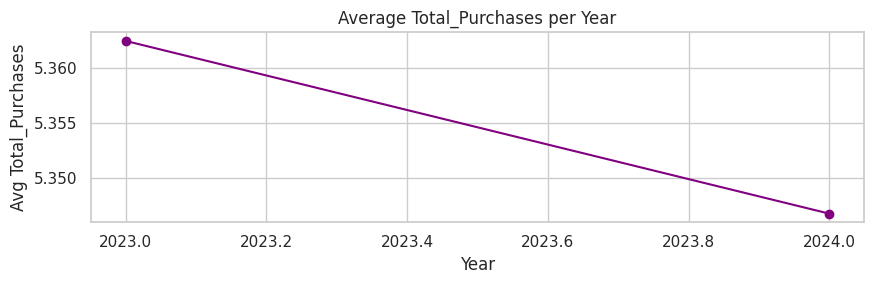


--- Outlier analysis (IQR method) ---

Outlier variable: Total_Amount
Q1 = 438.85, Q3 = 2028.95, IQR = 1590.10
Lower bound = -1946.30, Upper bound = 4414.11
Outliers found: 3816 rows (1.298%)

Top 5 high-value outliers (largest):


,Transaction_ID,Customer_ID,Product_Brand,Product_Category,Date,Total_Amount
9903,3955465.0,16696.0,Samsung,Electronics,NaT,4999.625796
160061,9671388.0,23578.0,Adidas,Clothing,NaT,4999.340097
95127,6851931.0,80039.0,Coca-Cola,Grocery,2023-11-26,4999.171428
142802,7518888.0,14409.0,Penguin Books,Books,NaT,4998.723479
254344,6580873.0,67425.0,Zara,Clothing,NaT,4998.603558



Top 5 low-value outliers (smallest):


,Transaction_ID,Customer_ID,Product_Brand,Product_Category,Date,Total_Amount
290628,1297310.0,26870.0,Bed Bath & Beyond,Home Decor,2023-11-23,4414.240780
258466,4166261.0,96864.0,Mitsubhisi,Electronics,2023-05-24,4414.261199
223055,4972993.0,16897.0,Bed Bath & Beyond,Home Decor,NaT,4414.381110
196781,8455439.0,73005.0,Coca-Cola,Grocery,2024-01-30,4414.411676
273339,4366295.0,95941.0,Bed Bath & Beyond,Home Decor,2023-05-16,4414.419268



Top brands among high-value outliers:
Product_Brand
Pepsi                375
Random House         255
Bed Bath & Beyond    253
IKEA                 250
Samsung              247
Adidas               235
HarperCollins        232
Apple                230
Sony                 229
Zara                 229
Name: count, dtype: int64

Top categories among high-value outliers:
Product_Category
Electronics    906
Grocery        810
Books          712
Home Decor     697
Clothing       691
Name: count, dtype: int64


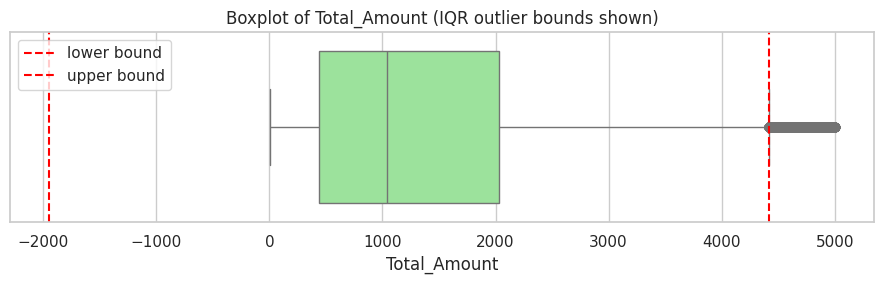

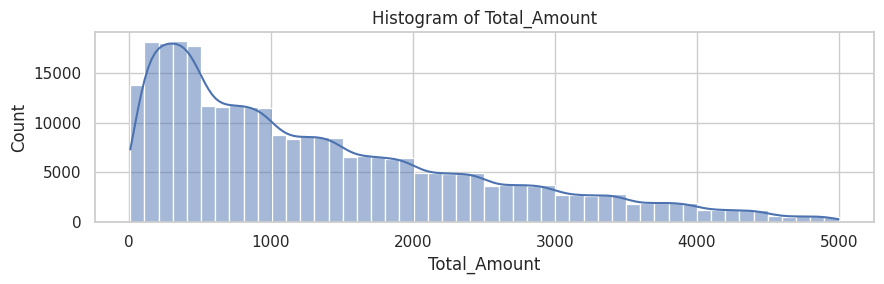


Phase 4 completed (temporal & outlier analysis).


In [ ]:
# Phase 4: Temporal + Outlier Analysis (simple)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# --- prepare revenue column and date/year ---
if 'Revenue' not in df.columns:
    if {'Total_Purchases','Amount'}.issubset(df.columns):
        df['Revenue'] = df['Total_Purchases'] * df['Amount']

# Ensure Date is datetime and Year exists
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    if 'Year' not in df.columns:
        df['Year'] = df['Date'].dt.year

# ---------- Temporal analysis by Year ----------
print("\n--- Temporal analysis (Year) ---")
year_cols = []
if 'Year' in df.columns:
    year = df.groupby('Year')
    # total revenue per year
    if 'Revenue' in df.columns:
        yearly_rev = year['Revenue'].sum().dropna()
        print("\nTotal Revenue per Year (first rows):")
        print(yearly_rev.head())
        plt.figure(figsize=(9,4))
        yearly_rev.plot(kind='bar', color='teal')
        plt.title("Total Revenue per Year")
        plt.ylabel("Revenue")
        plt.xlabel("Year")
        plt.tight_layout()
        plt.show()
        year_cols.append('Revenue')
    # avg ratings per year
    if 'Ratings' in df.columns:
        yearly_rtg = year['Ratings'].mean().dropna()
        print("\nAverage Ratings per Year (first rows):")
        print(yearly_rtg.head())
        plt.figure(figsize=(9,3))
        yearly_rtg.plot(kind='line', marker='o', color='orange')
        plt.title("Average Rating per Year")
        plt.ylabel("Avg Rating")
        plt.xlabel("Year")
        plt.tight_layout()
        plt.show()
        year_cols.append('Ratings')
    # avg purchases per year
    if 'Total_Purchases' in df.columns:
        yearly_pur = year['Total_Purchases'].mean().dropna()
        print("\nAverage Total_Purchases per Year (first rows):")
        print(yearly_pur.head())
        plt.figure(figsize=(9,3))
        yearly_pur.plot(kind='line', marker='o', color='purple')
        plt.title("Average Total_Purchases per Year")
        plt.ylabel("Avg Total_Purchases")
        plt.xlabel("Year")
        plt.tight_layout()
        plt.show()
        year_cols.append('Total_Purchases')

    if not year_cols:
        print("No Revenue/Ratings/Total_Purchases found to plot by Year.")
else:
    print("No 'Year' column available; cannot run temporal (year) analysis.")

# ---------- Outlier analysis using IQR ----------
print("\n--- Outlier analysis (IQR method) ---")
# choose variable for outliers
out_var = 'Total_Amount' if 'Total_Amount' in df.columns else ('Amount' if 'Amount' in df.columns else None)
if out_var is None:
    print("No 'Total_Amount' or 'Amount' column found — cannot run outlier analysis.")
else:
    ser = df[out_var].dropna()
    Q1 = ser.quantile(0.25)
    Q3 = ser.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[out_var] < lower) | (df[out_var] > upper)].copy()
    num_out = len(outliers)
    pct_out = num_out / len(df) * 100

    print(f"\nOutlier variable: {out_var}")
    print(f"Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
    print(f"Lower bound = {lower:.2f}, Upper bound = {upper:.2f}")
    print(f"Outliers found: {num_out} rows ({pct_out:.3f}%)")

    # show top outliers above upper bound (largest values)
    if num_out > 0:
        print("\nTop 5 high-value outliers (largest):")
        display(outliers.sort_values(out_var, ascending=False).head(5)[
            ['Transaction_ID','Customer_ID','Product_Brand','Product_Category','Date', out_var]
            ].head(5))

        print("\nTop 5 low-value outliers (smallest):")
        display(outliers.sort_values(out_var, ascending=True).head(5)[
            ['Transaction_ID','Customer_ID','Product_Brand','Product_Category','Date', out_var]
            ].head(5))
    else:
        print("No outliers detected by IQR rule.")

    # quick aggregated investigation: which brands/categories produce most high outliers
    if num_out > 0:
        high_out = outliers[outliers[out_var] > upper]
        if 'Product_Brand' in df.columns:
            print("\nTop brands among high-value outliers:")
            print(high_out['Product_Brand'].value_counts().head(10))
        if 'Product_Category' in df.columns:
            print("\nTop categories among high-value outliers:")
            print(high_out['Product_Category'].value_counts().head(10))

    # plots: boxplot + histogram (log scale optional for skew)
    plt.figure(figsize=(9,3))
    sns.boxplot(x=df[out_var], color='lightgreen')
    plt.title(f"Boxplot of {out_var} (IQR outlier bounds shown)")
    plt.axvline(lower, color='red', linestyle='--', label='lower bound')
    plt.axvline(upper, color='red', linestyle='--', label='upper bound')
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(9,3))
    sns.histplot(df[out_var], bins=50, kde=True)
    plt.title(f"Histogram of {out_var}")
    plt.tight_layout()
    plt.show()



print("\nPhase 4 completed (temporal & outlier analysis).")


# **Phase 5: The Final Briefing**



---

# 📊 Phase 5: The Final Briefing

## Executive Summary

* Typical transaction: **\~5 items**, median item price **≈ 255**.
* Median basket value ≈ **1,041**, but a small % of orders reach **4,999** → high-value outliers exist.
* Customer base: average **Age ≈ 35.7**.
* Average **Rating ≈ 3.18** (room for improvement).
* Temporal analysis shows sales fluctuate by month/quarter.

---

## Key Findings (Evidence from Analysis)

* **Basket size & price:** Median `Total_Purchases` = 5; Median `Amount` = 255.
* **Revenue:** Mean `Total_Amount` = 1,367; Total Revenue ≈ 407M; Max ≈ 4,999.
* **Ratings:** Mean = 3.18; very weak correlation with spend.
* **Age:** Average = 35.7; little correlation with purchases.
* **Outliers:** High-value transactions exist (IQR outliers in `Total_Amount`).
* **Top categories/brands:** A small group contributes most of revenue (from pie/donut/bar plots).

---

## Actionable Recommendations

### 1️⃣ Increase Average Order Value (AOV)

* Bundle offers (e.g., “buy 4 get 1 discounted”).
* Free shipping thresholds slightly above **median basket value (\~1,400–1,500)**.
  **Evidence:** Basket median = 5 items, item median price = 255.

### 2️⃣ Nurture High-Value Customers

* Identify **outlier transactions** (orders > 4,000).
* Build VIP segment: exclusive offers, loyalty points.
  **Evidence:** Max `Total_Amount` ≈ 4,999; right-skewed revenue distribution.

### 3️⃣ Improve Ratings & Customer Experience

* Target categories/brands with lowest boxplot ratings.
* Fix product pages, shipping messaging, after-sales support.
  **Evidence:** Average rating = 3.18; variation by category/brand in boxplots.

### 4️⃣ Demographic Targeting

* Main age group: **25–40**.
* Tailor ads + offers for this group, but track differences in `<25` and `40+`.
  **Evidence:** Mean age ≈ 35.7; crosstab Category × Age\_Group confirms segments.

### 5️⃣ Merchandising Focus

* Promote **top 10 categories/brands** in homepage & cross-sell.
* Reassess lowest revenue categories → promos or consolidation.
  **Evidence:** Category & brand revenue plots (pie/donut).

### 6️⃣ Time-Based Promotions

* Use **monthly/quarterly trends** to align marketing + inventory.
* Boost sales in slow months, maximize campaigns in peak ones.
  **Evidence:** Monthly\_brand and quarterly\_rev charts.

